In [0]:
## Kelompok 7
### Anggota Kelompok:
<ol>
  <li>Stevan Bandong</li>
  <li>Okky Jayadi</li>
  <li>Fakhrizal Muttaqien</li>
  <li>Haposan Trijaya</li>
  <li>Yanti Mulyanti</li>
</ol>

## Case 1: Automobile Dataset

# Dataset (2): Wine dataset
## 1.Examine your problem (Task Understanding)
#### Task : Untuk memprediksi kualitas wine menggunakan metode klasifikasi
#### Performance : Akurasi (F1 Score)
#### Experience : Melatih mesin untuk memprediksi kualitas wine menggunakan data feature yang tersedia
    

## 2. Prepare Your Data

In [1]:
import pandas as pd

In [2]:
#wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",sep=';')
wine=pd.read_csv('D:\Documents\Pelatihan AI\Modul DTS AI\Data wine quality\winequality-white.csv',sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
wine.shape

(4898, 12)

### 2a. Identify and fix incorrectness of data type assignment

In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Dapat terlihat dari data wine dan juga type data tiap atributnya telah memiliki type data yang sesuai sehingga tidak ada incorrectness data type assignment

### 2b. Identify and fix missing values

In [6]:
for i in range(len(wine.columns)):
    a=wine.columns[i]=='?'
    if a==False :
        print (wine.columns[i],': Tidak ada data kosong')
    else :
        nr=wine[wine.columns[i]=='?'].shape[0]
        if nr>0:
            print(wine.columns[i],':',nr)

fixed acidity : Tidak ada data kosong
volatile acidity : Tidak ada data kosong
citric acid : Tidak ada data kosong
residual sugar : Tidak ada data kosong
chlorides : Tidak ada data kosong
free sulfur dioxide : Tidak ada data kosong
total sulfur dioxide : Tidak ada data kosong
density : Tidak ada data kosong
pH : Tidak ada data kosong
sulphates : Tidak ada data kosong
alcohol : Tidak ada data kosong
quality : Tidak ada data kosong


In [7]:
wine.isnull().values.any()

False

## Split Data Latih dan Data Tes

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split 
wine_atribut=np.array(wine.drop(columns=['quality']))
wine_target=np.array(wine['quality'])
(trainX, testX, trainY, testY) = train_test_split(wine_atribut, wine_target, test_size=0.2)
trainY=trainY.reshape(trainY.shape[0],1)
wine_train=np.concatenate([trainX,trainY],axis=1)
wine_train=pd.DataFrame(wine_train,columns=wine.columns)

In [9]:
wine_train.shape

(3918, 12)

##### Digunakan 80 % sebagai data latih dan 20 % sebagai data uji

### 2c. Identify and fix outliers

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
f, axes = plt.subplots(4, 3, figsize=(50,50), sharex=True)
#sns.(y=car[0]).set_title('basic plot')
sns.boxplot(y=wine_train['fixed acidity'],ax=axes[0][0])
sns.boxplot(y=wine_train['volatile acidity'],ax=axes[0][1])
sns.boxplot(y=wine_train['citric acid'],ax=axes[0][2])
sns.boxplot(y=wine_train['residual sugar'],ax=axes[1][0])
sns.boxplot(y=wine_train['chlorides'],ax=axes[1][1])
sns.boxplot(y=wine_train['free sulfur dioxide'],ax=axes[1][2])
sns.boxplot(y=wine_train['total sulfur dioxide'],ax=axes[2][0])
sns.boxplot(y=wine_train['density'],ax=axes[2][1])
sns.boxplot(y=wine_train['pH'],ax=axes[2][2])
sns.boxplot(y=wine_train['sulphates'],ax=axes[3][0])
sns.boxplot(y=wine_train['alcohol'],ax=axes[3][1])
sns.boxplot(y=wine_train['quality'],ax=axes[3][2])

In [11]:
Q1 = wine_train.quantile(0.25)
Q3 = wine_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            1.000000
volatile acidity         0.110000
citric acid              0.120000
residual sugar           8.200000
chlorides                0.014000
free sulfur dioxide     23.000000
total sulfur dioxide    60.000000
density                  0.004375
pH                       0.190000
sulphates                0.140000
alcohol                  1.900000
quality                  1.000000
dtype: float64


In [12]:
A=(wine_train < (Q1 - 1.5 * IQR)) |(wine_train > (Q3 + 1.5 * IQR))
print(A.any()) #Jika True maka ada outlier
A.shape

fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar           True
chlorides                True
free sulfur dioxide      True
total sulfur dioxide     True
density                  True
pH                       True
sulphates                True
alcohol                 False
quality                  True
dtype: bool


(3918, 12)

In [13]:
wine_train_removed_outlier = wine_train[~((wine_train < (Q1 - 1.5 * IQR)) |(wine_train > (Q3 + 1.5 * IQR))).any(axis=1)]
B=(wine_train_removed_outlier < (Q1 - 1.5 * IQR)) |(wine_train_removed_outlier > (Q3 + 1.5 * IQR))
print(B.any()) #Jika True maka ada outlier
wine_train_removed_outlier.shape

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


(3071, 12)

#### Outlier telah berhasil di hapus dimana baris data yang sebelumnya berjumlah 3918 menjadi 3071

### 2d. Identify and fix imbalanced dataset

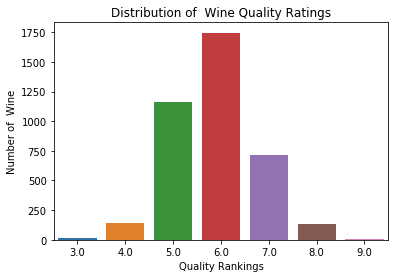

In [14]:
sns.barplot(wine_train['quality'].unique(),wine_train['quality'].value_counts())
plt.xlabel("Quality Rankings")
plt.ylabel("Number of  Wine")
plt.title("Distribution of  Wine Quality Ratings")
plt.show()

Dapat dilihat bahwa terjadi imbalance data karena ada kualitas wine yang bersifat mayoritas dibandingkan yang lainnya

#### Fix Imbalanced Data

In [15]:
max_freq=wine_train['quality'].mode()[0] #max_freq mengamil quality wine yang memiliki frekuensi paling tinggi
n=wine_train[wine_train['quality']==max_freq].shape[0]

In [16]:
from sklearn.utils import resample
df_quality3_upsampled = resample(wine_train[wine_train['quality']==3], replace=True,n_samples=n)
df_quality4_upsampled = resample(wine_train[wine_train['quality']==4], replace=True,n_samples=n)
df_quality5_upsampled = resample(wine_train[wine_train['quality']==5], replace=True,n_samples=n)
df_quality7_upsampled = resample(wine_train[wine_train['quality']==7], replace=True,n_samples=n)
df_quality8_upsampled = resample(wine_train[wine_train['quality']==8], replace=True,n_samples=n)
df_quality9_upsampled = resample(wine_train[wine_train['quality']==9], replace=True,n_samples=n)


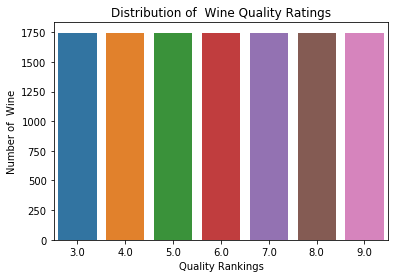

In [17]:
wine_train = pd.concat([wine_train[wine_train['quality']==6], df_quality3_upsampled,df_quality4_upsampled,df_quality5_upsampled,df_quality7_upsampled,df_quality8_upsampled,df_quality9_upsampled])
sns.barplot(wine_train['quality'].unique(),wine_train['quality'].value_counts())
plt.xlabel("Quality Rankings")
plt.ylabel("Number of  Wine")
plt.title("Distribution of  Wine Quality Ratings")
plt.show()

Dapat dilihat pada gambar bahwa data wine yang sebelumnya imbalance telah dibuat balance dengan menggunakan teknik upsample mengikuti jumlah sample mayoritas

## Standarisasi Data Menggunakan Standard Scaler dan Ekstrakting Feature Menggunakan PCA

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#trainX=np.array(wine_train.drop(['quality'],axis=1))
#trainY=np.array(wine_train['quality']).reshape(wine_train['quality'].shape[0],1)

scaler=StandardScaler()
trainX = scaler.fit_transform(trainX) # normalizing the features:
testX=scaler.transform(testX)
pca = PCA(n_components=3)
trainX= pca.fit_transform(trainX)
testX=pca.transform(testX) 

## 3.Prepare The Experiments
#### 3a. Tentukan tujuan penelitian

##### Tujuan Penelitian ini  adalah untuk mendapatkan model untuk mengestimasi atau memprediksi kualitas wine dengan tingkat akurasi yang tinggi

#### 3b. Pemilihan variabel respon: ukuran kualitas/ kinerja

##### Karena output masalah ini berbentuk kategori kualitas wine maka ini adalah permasalahan kualifikasi. Oleh karena itu ukuran kualitas atau kinerja (Akurasi) yang digunakan adalah F1 score

#### 3c. Pemilihan faktor dan Level

#### Pada tugas ini digunakan 6 macam mesin pembelajar untuk klasifikasi dengan faktor dan level yang mempengaruhi :
#### 1. K nearest Nighbor
#### 2. naive_bayesr
#### 3. LogisticRegression
#### 4. SVC
#### 5. DecisionTreeClassifier
#### 6. RandomForestClassifier

#### 3d. Pemilihan Desain Eksperimen
#### 1. Memilih Strategi yang diterapkan : Gridsearch. Sebab row data yang akan diolah tidak terlalu banyak dan model akan mencari akurasi yang terbaik berdasarkan semua kombinasi parameter.
#### 2. Memilih Skema Eksperimen yang diterapkan : k-fold cross validation sebab hasil model di validasi ke semua data sehingga lebih teliti

## 4. Spot-check a set of algorithms (Modelling)

In [19]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import train_test_split

### Import GridSearchCV untuk pencaraian parameter optimal menggunakan Grid Search dan penggunaan Cross Validasi

In [20]:
from sklearn.model_selection import GridSearchCV
# Import GridSearchCV untuk pencaraian parameter optimal menggunakan Grid Search dan penggunaan Cross Validasi

### KNN Classifier

In [21]:
parameters = {'metric':('euclidean','manhattan','chebyshev'),'n_neighbors':range(1,10)}
cross_validasi=5
#scoring = make_scorer(f1_score(average='samples'))
model_KNN=GridSearchCV(KNeighborsClassifier(), parameters,scoring='f1_micro', cv=cross_validasi, verbose=5)
model_KNN.fit(trainX,trainY)
print('Parameter terbaik model KNN =',model_KNN.best_params_)
print('Akurasi terbaik Cross Validation diperoleh =',model_KNN.best_score_)
print('Akurasi Prediksi/Estimasi Menggunakan KNN pada Data Tes=',model_KNN.score(testX,testY))
Hasil_prediksi_KNN=model_KNN.predict(testX)
Akurasi_KNN=model_KNN.best_score_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] metric=euclidean, n_neighbors=1 .................................
[CV]  metric=euclidean, n_neighbors=1, score=0.5438373570520966, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV]  metric=euclidean, n_neighbors=1, score=0.5535714285714286, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV]  metric=euclidean, n_neighbors=1, score=0.5363984674329502, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV]  metric=euclidean, n_neighbors=1, score=0.5466155810983397, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV]  metric=euclidean, n_neighbors=1, score=0.5108834827144686, total=   0.0s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV]  metric=euclidean, n_neighbors=2, score=0.4841168996188056, total=   0.0s
[CV] metric=euclidean, n_neighbors=2 .

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  metric=euclidean, n_neighbors=2, score=0.4814340588988476, total=   0.0s
[CV] metric=euclidean, n_neighbors=3 .................................
[CV]  metric=euclidean, n_neighbors=3, score=0.48030495552731894, total=   0.0s
[CV] metric=euclidean, n_neighbors=3 .................................
[CV]  metric=euclidean, n_neighbors=3, score=0.4872448979591837, total=   0.0s
[CV] metric=euclidean, n_neighbors=3 .................................
[CV]  metric=euclidean, n_neighbors=3, score=0.4776500638569604, total=   0.0s
[CV] metric=euclidean, n_neighbors=3 .................................
[CV]  metric=euclidean, n_neighbors=3, score=0.44061302681992337, total=   0.0s
[CV] metric=euclidean, n_neighbors=3 .................................
[CV]  metric=euclidean, n_neighbors=3, score=0.4443021766965429, total=   0.0s
[CV] metric=euclidean, n_neighbors=4 .................................
[CV]  metric=euclidean, n_neighbors=4, score=0.47903430749682335, total=   0.0s
[CV] metric=euclid

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was


[CV] metric=euclidean, n_neighbors=5 .................................
[CV]  metric=euclidean, n_neighbors=5, score=0.4714104193138501, total=   0.0s
[CV] metric=euclidean, n_neighbors=5 .................................
[CV]  metric=euclidean, n_neighbors=5, score=0.5178571428571429, total=   0.0s
[CV] metric=euclidean, n_neighbors=5 .................................
[CV]  metric=euclidean, n_neighbors=5, score=0.4840357598978289, total=   0.0s
[CV] metric=euclidean, n_neighbors=5 .................................
[CV]  metric=euclidean, n_neighbors=5, score=0.44699872286079184, total=   0.0s
[CV] metric=euclidean, n_neighbors=5 .................................
[CV]  metric=euclidean, n_neighbors=5, score=0.44814340588988477, total=   0.0s
[CV] metric=euclidean, n_neighbors=6 .................................
[CV]  metric=euclidean, n_neighbors=6, score=0.46886912325285895, total=   0.0s
[CV] metric=euclidean, n_neighbors=6 .................................
[CV]  metric=euclidean, n

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

[CV]  metric=euclidean, n_neighbors=6, score=0.4559386973180077, total=   0.0s
[CV] metric=euclidean, n_neighbors=6 .................................
[CV]  metric=euclidean, n_neighbors=6, score=0.4494238156209987, total=   0.0s
[CV] metric=euclidean, n_neighbors=7 .................................
[CV]  metric=euclidean, n_neighbors=7, score=0.46505717916137235, total=   0.0s
[CV] metric=euclidean, n_neighbors=7 .................................
[CV]  metric=euclidean, n_neighbors=7, score=0.49744897959183676, total=   0.0s
[CV] metric=euclidean, n_neighbors=7 .................................
[CV]  metric=euclidean, n_neighbors=7, score=0.5031928480204342, total=   0.0s
[CV] metric=euclidean, n_neighbors=7 .................................
[CV]  metric=euclidean, n_neighbors=7, score=0.44316730523627074, total=   0.0s
[CV] metric=euclidean, n_neighbors=7 .................................
[CV]  metric=euclidean, n_neighbors=7, score=0.4558258642765685, total=   0.0s
[CV] metric=euclid

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was


[CV] metric=euclidean, n_neighbors=8 .................................
[CV]  metric=euclidean, n_neighbors=8, score=0.5012755102040817, total=   0.0s
[CV] metric=euclidean, n_neighbors=8 .................................
[CV]  metric=euclidean, n_neighbors=8, score=0.5031928480204342, total=   0.0s
[CV] metric=euclidean, n_neighbors=8 .................................
[CV]  metric=euclidean, n_neighbors=8, score=0.4559386973180077, total=   0.0s
[CV] metric=euclidean, n_neighbors=8 .................................
[CV]  metric=euclidean, n_neighbors=8, score=0.45838668373879643, total=   0.0s
[CV] metric=euclidean, n_neighbors=9 .................................
[CV]  metric=euclidean, n_neighbors=9, score=0.4726810673443456, total=   0.0s
[CV] metric=euclidean, n_neighbors=9 .................................
[CV]  metric=euclidean, n_neighbors=9, score=0.5038265306122449, total=   0.0s
[CV] metric=euclidean, n_neighbors=9 .................................
[CV]  metric=euclidean, n_n

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

[CV]  metric=euclidean, n_neighbors=9, score=0.4367816091954023, total=   0.0s
[CV] metric=euclidean, n_neighbors=9 .................................
[CV]  metric=euclidean, n_neighbors=9, score=0.4327784891165173, total=   0.0s
[CV] metric=manhattan, n_neighbors=1 .................................
[CV]  metric=manhattan, n_neighbors=1, score=0.5438373570520966, total=   0.0s
[CV] metric=manhattan, n_neighbors=1 .................................
[CV]  metric=manhattan, n_neighbors=1, score=0.5433673469387755, total=   0.0s
[CV] metric=manhattan, n_neighbors=1 .................................
[CV]  metric=manhattan, n_neighbors=1, score=0.5491698595146871, total=   0.0s
[CV] metric=manhattan, n_neighbors=1 .................................
[CV]  metric=manhattan, n_neighbors=1, score=0.541507024265645, total=   0.0s
[CV] metric=manhattan, n_neighbors=1 .................................
[CV]  metric=manhattan, n_neighbors=1, score=0.5172855313700384, total=   0.0s
[CV] metric=manhattan,

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was


[CV] metric=manhattan, n_neighbors=3 .................................
[CV]  metric=manhattan, n_neighbors=3, score=0.48148148148148145, total=   0.0s
[CV] metric=manhattan, n_neighbors=3 .................................
[CV]  metric=manhattan, n_neighbors=3, score=0.4482758620689655, total=   0.0s
[CV] metric=manhattan, n_neighbors=3 .................................
[CV]  metric=manhattan, n_neighbors=3, score=0.4353393085787452, total=   0.0s
[CV] metric=manhattan, n_neighbors=4 .................................
[CV]  metric=manhattan, n_neighbors=4, score=0.47522236340533675, total=   0.0s
[CV] metric=manhattan, n_neighbors=4 .................................
[CV]  metric=manhattan, n_neighbors=4, score=0.5076530612244898, total=   0.0s
[CV] metric=manhattan, n_neighbors=4 .................................
[CV]  metric=manhattan, n_neighbors=4, score=0.4840357598978289, total=   0.0s
[CV] metric=manhattan, n_neighbors=4 .................................
[CV]  metric=manhattan, n_

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was


[CV] metric=manhattan, n_neighbors=5 .................................
[CV]  metric=manhattan, n_neighbors=5, score=0.4891443167305236, total=   0.0s
[CV] metric=manhattan, n_neighbors=5 .................................
[CV]  metric=manhattan, n_neighbors=5, score=0.438058748403576, total=   0.0s
[CV] metric=manhattan, n_neighbors=5 .................................
[CV]  metric=manhattan, n_neighbors=5, score=0.4596670934699104, total=   0.0s
[CV] metric=manhattan, n_neighbors=6 .................................
[CV]  metric=manhattan, n_neighbors=6, score=0.49682337992376113, total=   0.0s
[CV] metric=manhattan, n_neighbors=6 .................................
[CV] ....... metric=manhattan, n_neighbors=6, score=0.5, total=   0.0s
[CV] metric=manhattan, n_neighbors=6 .................................
[CV]  metric=manhattan, n_neighbors=6, score=0.4955300127713921, total=   0.0s
[CV] metric=manhattan, n_neighbors=6 .................................
[CV]  metric=manhattan, n_neighbors=

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

[CV]  metric=manhattan, n_neighbors=7, score=0.49682337992376113, total=   0.0s
[CV] metric=manhattan, n_neighbors=7 .................................
[CV]  metric=manhattan, n_neighbors=7, score=0.5038265306122449, total=   0.0s
[CV] metric=manhattan, n_neighbors=7 .................................
[CV]  metric=manhattan, n_neighbors=7, score=0.4891443167305236, total=   0.0s
[CV] metric=manhattan, n_neighbors=7 .................................
[CV]  metric=manhattan, n_neighbors=7, score=0.43167305236270753, total=   0.0s
[CV] metric=manhattan, n_neighbors=7 .................................
[CV]  metric=manhattan, n_neighbors=7, score=0.44302176696542894, total=   0.0s
[CV] metric=manhattan, n_neighbors=8 .................................
[CV]  metric=manhattan, n_neighbors=8, score=0.49301143583227447, total=   0.0s
[CV] metric=manhattan, n_neighbors=8 .................................
[CV]  metric=manhattan, n_neighbors=8, score=0.5153061224489796, total=   0.0s
[CV] metric=manha

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

[CV]  metric=manhattan, n_neighbors=8, score=0.44061302681992337, total=   0.0s
[CV] metric=manhattan, n_neighbors=8 .................................
[CV]  metric=manhattan, n_neighbors=8, score=0.44814340588988477, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV]  metric=manhattan, n_neighbors=9, score=0.4777636594663278, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV]  metric=manhattan, n_neighbors=9, score=0.5114795918367347, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV]  metric=manhattan, n_neighbors=9, score=0.4891443167305236, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV]  metric=manhattan, n_neighbors=9, score=0.44316730523627074, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV]  metric=manhattan, n_neighbors=9, score=0.4558258642765685, total=   0.0s
[CV] metric=chebys

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

[CV]  metric=chebyshev, n_neighbors=1, score=0.5561224489795918, total=   0.0s
[CV] metric=chebyshev, n_neighbors=1 .................................
[CV]  metric=chebyshev, n_neighbors=1, score=0.5274584929757343, total=   0.0s
[CV] metric=chebyshev, n_neighbors=1 .................................
[CV]  metric=chebyshev, n_neighbors=1, score=0.5376756066411239, total=   0.0s
[CV] metric=chebyshev, n_neighbors=1 .................................
[CV]  metric=chebyshev, n_neighbors=1, score=0.5057618437900128, total=   0.0s
[CV] metric=chebyshev, n_neighbors=2 .................................
[CV]  metric=chebyshev, n_neighbors=2, score=0.48538754764930114, total=   0.0s
[CV] metric=chebyshev, n_neighbors=2 .................................
[CV]  metric=chebyshev, n_neighbors=2, score=0.4897959183673469, total=   0.0s
[CV] metric=chebyshev, n_neighbors=2 .................................
[CV]  metric=chebyshev, n_neighbors=2, score=0.4891443167305236, total=   0.0s
[CV] metric=chebyshe

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

[CV]  metric=chebyshev, n_neighbors=3, score=0.44814340588988477, total=   0.0s
[CV] metric=chebyshev, n_neighbors=4 .................................
[CV]  metric=chebyshev, n_neighbors=4, score=0.48792884371029227, total=   0.0s
[CV] metric=chebyshev, n_neighbors=4 .................................
[CV]  metric=chebyshev, n_neighbors=4, score=0.49744897959183676, total=   0.0s
[CV] metric=chebyshev, n_neighbors=4 .................................
[CV]  metric=chebyshev, n_neighbors=4, score=0.4878671775223499, total=   0.0s
[CV] metric=chebyshev, n_neighbors=4 .................................
[CV]  metric=chebyshev, n_neighbors=4, score=0.4559386973180077, total=   0.0s
[CV] metric=chebyshev, n_neighbors=4 .................................
[CV]  metric=chebyshev, n_neighbors=4, score=0.4647887323943662, total=   0.0s
[CV] metric=chebyshev, n_neighbors=5 .................................
[CV]  metric=chebyshev, n_neighbors=5, score=0.45108005082592123, total=   0.0s
[CV] metric=cheby

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

[CV]  metric=chebyshev, n_neighbors=5, score=0.43021766965428937, total=   0.0s
[CV] metric=chebyshev, n_neighbors=6 .................................
[CV]  metric=chebyshev, n_neighbors=6, score=0.45743329097839897, total=   0.0s
[CV] metric=chebyshev, n_neighbors=6 .................................
[CV]  metric=chebyshev, n_neighbors=6, score=0.5051020408163265, total=   0.0s
[CV] metric=chebyshev, n_neighbors=6 .................................
[CV]  metric=chebyshev, n_neighbors=6, score=0.48531289910600256, total=   0.0s
[CV] metric=chebyshev, n_neighbors=6 .................................
[CV]  metric=chebyshev, n_neighbors=6, score=0.4648786717752235, total=   0.0s
[CV] metric=chebyshev, n_neighbors=6 .................................
[CV]  metric=chebyshev, n_neighbors=6, score=0.4468629961587708, total=   0.0s
[CV] metric=chebyshev, n_neighbors=7 .................................
[CV]  metric=chebyshev, n_neighbors=7, score=0.4726810673443456, total=   0.0s
[CV] metric=chebys

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

[CV]  metric=chebyshev, n_neighbors=7, score=0.4878671775223499, total=   0.0s
[CV] metric=chebyshev, n_neighbors=7 .................................
[CV]  metric=chebyshev, n_neighbors=7, score=0.4393358876117497, total=   0.0s
[CV] metric=chebyshev, n_neighbors=7 .................................
[CV]  metric=chebyshev, n_neighbors=7, score=0.42765685019206146, total=   0.0s
[CV] metric=chebyshev, n_neighbors=8 .................................
[CV]  metric=chebyshev, n_neighbors=8, score=0.47395171537484115, total=   0.0s
[CV] metric=chebyshev, n_neighbors=8 .................................
[CV]  metric=chebyshev, n_neighbors=8, score=0.5102040816326531, total=   0.0s
[CV] metric=chebyshev, n_neighbors=8 .................................
[CV]  metric=chebyshev, n_neighbors=8, score=0.48020434227330777, total=   0.0s
[CV] metric=chebyshev, n_neighbors=8 .................................
[CV]  metric=chebyshev, n_neighbors=8, score=0.45849297573435505, total=   0.0s
[CV] metric=cheby

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

[CV]  metric=chebyshev, n_neighbors=9, score=0.4841168996188056, total=   0.0s
[CV] metric=chebyshev, n_neighbors=9 .................................
[CV]  metric=chebyshev, n_neighbors=9, score=0.5051020408163265, total=   0.0s
[CV] metric=chebyshev, n_neighbors=9 .................................
[CV]  metric=chebyshev, n_neighbors=9, score=0.4955300127713921, total=   0.0s
[CV] metric=chebyshev, n_neighbors=9 .................................
[CV]  metric=chebyshev, n_neighbors=9, score=0.44316730523627074, total=   0.0s
[CV] metric=chebyshev, n_neighbors=9 .................................
[CV]  metric=chebyshev, n_neighbors=9, score=0.4468629961587708, total=   0.0s
Parameter terbaik model KNN = {'metric': 'manhattan', 'n_neighbors': 1}
Akurasi terbaik Cross Validation diperoleh = 0.5390505359877489
Akurasi Prediksi/Estimasi Menggunakan KNN pada Data Tes= 0.6183673469387755


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was

In [22]:
testY=testY.reshape(testY.shape[0],1)
Hasil_prediksi_KNN=Hasil_prediksi_KNN.reshape(testY.shape[0],1)
PerbandinganHasil_KNN=np.append(Hasil_prediksi_KNN,testY,axis=1)
PerbandinganHasil_KNN=pd.DataFrame(PerbandinganHasil_KNN,columns=['Hasil Prediksi Quality','Quality'])
PerbandinganHasil_KNN.sample(10)

,Hasil Prediksi Quality,Quality
529,7,7
350,6,6
830,5,5
422,4,4
299,6,6
452,8,8
838,5,5
495,5,5
526,6,6
1,5,5


### Naive Bayes

In [23]:
# train the Naive Bayes model
print("[INFO] using '{}' model".format("Naive Bayes"))
model = GaussianNB()
model.fit(trainX, trainY)
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions))
score=classification_report(testY, predictions,output_dict=True)['micro avg']#Jika error gunakan dua baris di bawah karena sesuatu hal accuracy tidak tampil di jupyter saya
#score=classification_report(testY, predictions,output_dict=True)['accuracy']
#Akurasi_NaiveBayes=score
Akurasi_NaiveBayes=score['f1-score']

[INFO] using 'Naive Bayes' model
[INFO] evaluating...
              precision    recall  f1-score   support

           3       0.33      0.25      0.29         4
           4       0.25      0.15      0.19        34
           5       0.48      0.37      0.42       291
           6       0.50      0.80      0.61       452
           7       0.17      0.01      0.01       168
           8       0.00      0.00      0.00        31

   micro avg       0.48      0.48      0.48       980
   macro avg       0.29      0.26      0.25       980
weighted avg       0.41      0.48      0.42       980



C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average,

### Logistic Regression

In [24]:
# train the Logistic Regression model
parameters = {'solver':list(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),'C':range(1,10)}
cross_validasi=5
#scoring = make_scorer(f1_score(average='samples'))
model_LogisticRegression=GridSearchCV(LogisticRegression(), parameters,scoring='f1_micro', cv=cross_validasi, verbose=5)
model_LogisticRegression.fit(trainX,trainY)
print('Parameter terbaik model LogisticRegression =',model_LogisticRegression.best_params_)
print('Akurasi terbaik Cross Validation diperoleh =',model_LogisticRegression.best_score_)
print('Akurasi Prediksi/Estimasi Menggunakan LogisticRegression pada Data Tes=',model_LogisticRegression.score(testX,testY))
Hasil_prediksi_LogisticRegression=model_LogisticRegression.predict(testX)
Akurasi_LogisticRegression=model_LogisticRegression.best_score_


Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] C=1, solver=newton-cg ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=1, solver=newton-cg, score=0.48538754764930114, total=   0.2s
[CV] C=1, solver=newton-cg ...........................................
[CV] .. C=1, solver=newton-cg, score=0.4885204081632653, total=   0.0s
[CV] C=1, solver=newton-cg ...........................................
[CV] .. C=1, solver=newton-cg, score=0.4942528735632184, total=   0.0s
[CV] C=1, solver=newton-cg ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.

[CV] . C=1, solver=newton-cg, score=0.46360153256704983, total=   0.0s
[CV] C=1, solver=newton-cg ...........................................
[CV] .. C=1, solver=newton-cg, score=0.4622279129321382, total=   0.0s
[CV] C=1, solver=lbfgs ...............................................
[CV] ..... C=1, solver=lbfgs, score=0.48538754764930114, total=   0.0s
[CV] C=1, solver=lbfgs ...............................................
[CV] ...... C=1, solver=lbfgs, score=0.4885204081632653, total=   0.0s

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Sp


[CV] C=1, solver=lbfgs ...............................................
[CV] ...... C=1, solver=lbfgs, score=0.4942528735632184, total=   0.0s
[CV] C=1, solver=lbfgs ...............................................
[CV] ..... C=1, solver=lbfgs, score=0.46360153256704983, total=   0.0s
[CV] C=1, solver=lbfgs ...............................................
[CV] ...... C=1, solver=lbfgs, score=0.4622279129321382, total=   0.0s
[CV] C=1, solver=liblinear ...........................................
[CV] . C=1, solver=liblinear, score=0.48538754764930114, total=   0.0s
[CV] C=1, solver=liblinear ...........................................
[CV] .. C=1, solver=liblinear, score=0.4872448979591837, total=   0.0s
[CV] C=1, solver=liblinear ...........................................
[CV] .. C=1, solver=liblinear, score=0.4942528735632184, total=   0.0s

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW


[CV] C=1, solver=liblinear ...........................................
[CV] .. C=1, solver=liblinear, score=0.4610472541507024, total=   0.0s
[CV] C=1, solver=liblinear ...........................................
[CV] .. C=1, solver=liblinear, score=0.4622279129321382, total=   0.0s
[CV] C=1, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW

[CV] ....... C=1, solver=sag, score=0.48538754764930114, total=   0.2s
[CV] C=1, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=1, solver=sag, score=0.4885204081632653, total=   0.1s
[CV] C=1, solver=sag .................................................
[CV] ........ C=1, solver=sag, score=0.4942528735632184, total=   0.1s

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] C=1, solver=sag .................................................
[CV] ....... C=1, solver=sag, score=0.46360153256704983, total=   0.1s
[CV] C=1, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ........ C=1, solver=sag, score=0.4622279129321382, total=   0.1s
[CV] C=1, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=1, solver=saga, score=0.48538754764930114, total=   0.1s
[CV] C=1, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=1, solver=saga, score=0.4885204081632653, total=   0.2s
[CV] C=1, solver=saga ................................................
[CV] ....... C=1, solver=saga, score=0.4942528735632184, total=   0.1s
[CV] C=1, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ...... C=1, solver=saga, score=0.46360153256704983, total=   0.2s
[CV] C=1, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ....... C=1, solver=saga, score=0.4622279129321382, total=   0.1s
[CV] C=2, solver=newton-cg ...........................................
[CV] . C=2, solver=newton-cg, score=0.48538754764930114, total=   0.0s
[CV] C=2, solver=newton-cg ...........................................
[CV] .. C=2, solver=newton-cg, score=0.4885204081632653, total=   0.0s
[CV] C=2, solver=newton-cg ...........................................
[CV] .. C=2, solver=newton-cg, score=0.4942528735632184, total=   0.0s
[CV] C=2, solver=newton-cg ...........................................
[CV] . C=2, solver=newton-cg, score=0.46360153256704983, total=   0.0s
[CV] C=2, solver=newton-cg ...........................................
[CV] .. C=2, solver=newton-cg, score=0.4622279129321382, total=   0.0s
[CV] C=2, solver=lbfgs ...............................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW

[CV] ..... C=2, solver=lbfgs, score=0.48538754764930114, total=   0.0s
[CV] C=2, solver=lbfgs ...............................................
[CV] ...... C=2, solver=lbfgs, score=0.4885204081632653, total=   0.0s
[CV] C=2, solver=lbfgs ...............................................
[CV] ...... C=2, solver=lbfgs, score=0.4942528735632184, total=   0.0s
[CV] C=2, solver=lbfgs ...............................................
[CV] ..... C=2, solver=lbfgs, score=0.46360153256704983, total=   0.0s
[CV] C=2, solver=lbfgs ...............................................
[CV] ...... C=2, solver=lbfgs, score=0.4622279129321382, total=   0.0s
[CV] C=2, solver=liblinear ...........................................
[CV] . C=2, solver=liblinear, score=0.48538754764930114, total=   0.0s
[CV] C=2, solver=liblinear ...........................................
[CV] .. C=2, solver=liblinear, score=0.4885204081632653, total=   0.0s

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW


[CV] C=2, solver=liblinear ...........................................
[CV] .. C=2, solver=liblinear, score=0.4942528735632184, total=   0.0s
[CV] C=2, solver=liblinear ...........................................
[CV] .. C=2, solver=liblinear, score=0.4610472541507024, total=   0.0s
[CV] C=2, solver=liblinear ...........................................
[CV] .. C=2, solver=liblinear, score=0.4622279129321382, total=   0.0s
[CV] C=2, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW

[CV] ....... C=2, solver=sag, score=0.48538754764930114, total=   0.1s
[CV] C=2, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=2, solver=sag, score=0.4885204081632653, total=   0.2s
[CV] C=2, solver=sag .................................................
[CV] ........ C=2, solver=sag, score=0.4942528735632184, total=   0.2s
[CV] C=2, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=2, solver=sag, score=0.46360153256704983, total=   0.1s
[CV] C=2, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ........ C=2, solver=sag, score=0.4622279129321382, total=   0.1s
[CV] C=2, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=2, solver=saga, score=0.48538754764930114, total=   0.2s
[CV] C=2, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=2, solver=saga, score=0.4885204081632653, total=   0.2s
[CV] C=2, solver=saga ................................................
[CV] ....... C=2, solver=saga, score=0.4942528735632184, total=   0.1s
[CV] C=2, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ...... C=2, solver=saga, score=0.46360153256704983, total=   0.2s
[CV] C=2, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ....... C=2, solver=saga, score=0.4622279129321382, total=   0.1s
[CV] C=3, solver=newton-cg ...........................................
[CV] . C=3, solver=newton-cg, score=0.48538754764930114, total=   0.0s
[CV] C=3, solver=newton-cg ...........................................
[CV] .. C=3, solver=newton-cg, score=0.4885204081632653, total=   0.0s
[CV] C=3, solver=newton-cg ...........................................
[CV] .. C=3, solver=newton-cg, score=0.4942528735632184, total=   0.0s
[CV] C=3, solver=newton-cg ...........................................
[CV] . C=3, solver=newton-cg, score=0.46360153256704983, total=   0.0s
[CV] C=3, solver=newton-cg ...........................................
[CV] .. C=3, solver=newton-cg, score=0.4622279129321382, total=   0.0s
[CV] C=3, solver=lbfgs ...............................................
[CV] ..... C=3, solver=lbfgs, score=0.48538754764930114, total=   0.0s
[CV] C=3, solver=lbfgs ...............................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW

[CV] ...... C=3, solver=lbfgs, score=0.4885204081632653, total=   0.0s
[CV] C=3, solver=lbfgs ...............................................
[CV] ...... C=3, solver=lbfgs, score=0.4942528735632184, total=   0.0s
[CV] C=3, solver=lbfgs ...............................................
[CV] ..... C=3, solver=lbfgs, score=0.46360153256704983, total=   0.0s
[CV] C=3, solver=lbfgs ...............................................
[CV] ...... C=3, solver=lbfgs, score=0.4622279129321382, total=   0.0s
[CV] C=3, solver=liblinear ...........................................
[CV] . C=3, solver=liblinear, score=0.48538754764930114, total=   0.0s
[CV] C=3, solver=liblinear ...........................................
[CV] .. C=3, solver=liblinear, score=0.4885204081632653, total=   0.0s
[CV] C=3, solver=liblinear ...........................................
[CV] .. C=3, solver=liblinear, score=0.4942528735632184, total=   0.0s
[CV] C=3, solver=liblinear ...........................................
[CV] .

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW


[CV] C=3, solver=liblinear ...........................................
[CV] .. C=3, solver=liblinear, score=0.4622279129321382, total=   0.0s
[CV] C=3, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ....... C=3, solver=sag, score=0.48538754764930114, total=   0.1s
[CV] C=3, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=3, solver=sag, score=0.4885204081632653, total=   0.1s
[CV] C=3, solver=sag .................................................
[CV] ........ C=3, solver=sag, score=0.4942528735632184, total=   0.1s
[CV] C=3, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ....... C=3, solver=sag, score=0.46360153256704983, total=   0.2s
[CV] C=3, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=3, solver=sag, score=0.4622279129321382, total=   0.2s
[CV] C=3, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=3, solver=saga, score=0.48538754764930114, total=   0.2s
[CV] C=3, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=3, solver=saga, score=0.4885204081632653, total=   0.2s
[CV] C=3, solver=saga ................................................
[CV] ....... C=3, solver=saga, score=0.4942528735632184, total=   0.1s
[CV] C=3, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ...... C=3, solver=saga, score=0.46360153256704983, total=   0.2s
[CV] C=3, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ....... C=3, solver=saga, score=0.4622279129321382, total=   0.2s
[CV] C=4, solver=newton-cg ...........................................
[CV] . C=4, solver=newton-cg, score=0.48538754764930114, total=   0.0s
[CV] C=4, solver=newton-cg ...........................................
[CV] .. C=4, solver=newton-cg, score=0.4885204081632653, total=   0.0s
[CV] C=4, solver=newton-cg ...........................................
[CV] .. C=4, solver=newton-cg, score=0.4942528735632184, total=   0.0s
[CV] C=4, solver=newton-cg ...........................................
[CV] . C=4, solver=newton-cg, score=0.46360153256704983, total=   0.0s
[CV] C=4, solver=newton-cg ...........................................
[CV] .. C=4, solver=newton-cg, score=0.4622279129321382, total=   0.0s
[CV] C=4, solver=lbfgs ...............................................
[CV] ..... C=4, solver=lbfgs, score=0.48538754764930114, total=   0.0s
[CV] C=4, solver=lbfgs ...............................................
[CV] .

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW


[CV] C=4, solver=lbfgs ...............................................
[CV] ...... C=4, solver=lbfgs, score=0.4942528735632184, total=   0.0s
[CV] C=4, solver=lbfgs ...............................................
[CV] ..... C=4, solver=lbfgs, score=0.46360153256704983, total=   0.0s
[CV] C=4, solver=lbfgs ...............................................
[CV] ...... C=4, solver=lbfgs, score=0.4622279129321382, total=   0.0s
[CV] C=4, solver=liblinear ...........................................
[CV] . C=4, solver=liblinear, score=0.48538754764930114, total=   0.0s
[CV] C=4, solver=liblinear ...........................................
[CV] .. C=4, solver=liblinear, score=0.4885204081632653, total=   0.0s
[CV] C=4, solver=liblinear ...........................................
[CV] .. C=4, solver=liblinear, score=0.4942528735632184, total=   0.0s

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW


[CV] C=4, solver=liblinear ...........................................
[CV] .. C=4, solver=liblinear, score=0.4610472541507024, total=   0.0s
[CV] C=4, solver=liblinear ...........................................
[CV] .. C=4, solver=liblinear, score=0.4622279129321382, total=   0.0s
[CV] C=4, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW

[CV] ....... C=4, solver=sag, score=0.48538754764930114, total=   0.1s
[CV] C=4, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=4, solver=sag, score=0.4885204081632653, total=   0.2s
[CV] C=4, solver=sag .................................................
[CV] ........ C=4, solver=sag, score=0.4942528735632184, total=   0.1s
[CV] C=4, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ....... C=4, solver=sag, score=0.46360153256704983, total=   0.1s
[CV] C=4, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=4, solver=sag, score=0.4622279129321382, total=   0.1s
[CV] C=4, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=4, solver=saga, score=0.48538754764930114, total=   0.1s
[CV] C=4, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ....... C=4, solver=saga, score=0.4885204081632653, total=   0.1s
[CV] C=4, solver=saga ................................................
[CV] ....... C=4, solver=saga, score=0.4942528735632184, total=   0.1s
[CV] C=4, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=4, solver=saga, score=0.46360153256704983, total=   0.2s
[CV] C=4, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ....... C=4, solver=saga, score=0.4622279129321382, total=   0.2s
[CV] C=5, solver=newton-cg ...........................................
[CV] . C=5, solver=newton-cg, score=0.48538754764930114, total=   0.0s
[CV] C=5, solver=newton-cg ...........................................
[CV] .. C=5, solver=newton-cg, score=0.4885204081632653, total=   0.0s
[CV] C=5, solver=newton-cg ...........................................
[CV] .. C=5, solver=newton-cg, score=0.4942528735632184, total=   0.0s
[CV] C=5, solver=newton-cg ...........................................
[CV] . C=5, solver=newton-cg, score=0.46360153256704983, total=   0.0s
[CV] C=5, solver=newton-cg ...........................................
[CV] .. C=5, solver=newton-cg, score=0.4622279129321382, total=   0.0s
[CV] C=5, solver=lbfgs ...............................................
[CV] ..... C=5, solver=lbfgs, score=0.48538754764930114, total=   0.0s
[CV] C=5, solver=lbfgs ...............................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW

[CV] ...... C=5, solver=lbfgs, score=0.4885204081632653, total=   0.0s
[CV] C=5, solver=lbfgs ...............................................
[CV] ...... C=5, solver=lbfgs, score=0.4942528735632184, total=   0.0s
[CV] C=5, solver=lbfgs ...............................................
[CV] ..... C=5, solver=lbfgs, score=0.46360153256704983, total=   0.0s
[CV] C=5, solver=lbfgs ...............................................
[CV] ...... C=5, solver=lbfgs, score=0.4622279129321382, total=   0.0s
[CV] C=5, solver=liblinear ...........................................
[CV] . C=5, solver=liblinear, score=0.48538754764930114, total=   0.0s
[CV] C=5, solver=liblinear ...........................................
[CV] .. C=5, solver=liblinear, score=0.4885204081632653, total=   0.0s
[CV] C=5, solver=liblinear ...........................................
[CV] .. C=5, solver=liblinear, score=0.4942528735632184, total=   0.0s
[CV] C=5, solver=liblinear ...........................................
[CV] .

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW


[CV] C=5, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ....... C=5, solver=sag, score=0.48538754764930114, total=   0.2s
[CV] C=5, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=5, solver=sag, score=0.4885204081632653, total=   0.2s
[CV] C=5, solver=sag .................................................
[CV] ........ C=5, solver=sag, score=0.4942528735632184, total=   0.1s
[CV] C=5, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ....... C=5, solver=sag, score=0.46360153256704983, total=   0.1s
[CV] C=5, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=5, solver=sag, score=0.4622279129321382, total=   0.2s
[CV] C=5, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=5, solver=saga, score=0.48538754764930114, total=   0.1s
[CV] C=5, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=5, solver=saga, score=0.4885204081632653, total=   0.2s
[CV] C=5, solver=saga ................................................
[CV] ....... C=5, solver=saga, score=0.4942528735632184, total=   0.1s
[CV] C=5, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ...... C=5, solver=saga, score=0.46360153256704983, total=   0.2s
[CV] C=5, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ....... C=5, solver=saga, score=0.4622279129321382, total=   0.2s
[CV] C=6, solver=newton-cg ...........................................
[CV] . C=6, solver=newton-cg, score=0.48538754764930114, total=   0.0s
[CV] C=6, solver=newton-cg ...........................................
[CV] .. C=6, solver=newton-cg, score=0.4885204081632653, total=   0.0s
[CV] C=6, solver=newton-cg ...........................................
[CV] .. C=6, solver=newton-cg, score=0.4942528735632184, total=   0.0s
[CV] C=6, solver=newton-cg ...........................................
[CV] . C=6, solver=newton-cg, score=0.46360153256704983, total=   0.0s
[CV] C=6, solver=newton-cg ...........................................
[CV] .. C=6, solver=newton-cg, score=0.4622279129321382, total=   0.0s
[CV] C=6, solver=lbfgs ...............................................
[CV] ..... C=6, solver=lbfgs, score=0.48538754764930114, total=   0.0s
[CV] C=6, solver=lbfgs ...............................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW

[CV] ...... C=6, solver=lbfgs, score=0.4885204081632653, total=   0.0s
[CV] C=6, solver=lbfgs ...............................................
[CV] ...... C=6, solver=lbfgs, score=0.4942528735632184, total=   0.0s
[CV] C=6, solver=lbfgs ...............................................
[CV] ..... C=6, solver=lbfgs, score=0.46360153256704983, total=   0.0s
[CV] C=6, solver=lbfgs ...............................................
[CV] ...... C=6, solver=lbfgs, score=0.4622279129321382, total=   0.0s
[CV] C=6, solver=liblinear ...........................................
[CV] . C=6, solver=liblinear, score=0.48538754764930114, total=   0.0s
[CV] C=6, solver=liblinear ...........................................
[CV] .. C=6, solver=liblinear, score=0.4885204081632653, total=   0.0s
[CV] C=6, solver=liblinear ...........................................
[CV] .. C=6, solver=liblinear, score=0.4942528735632184, total=   0.0s
[CV] C=6, solver=liblinear ...........................................
[CV] .

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW


[CV] C=6, solver=liblinear ...........................................
[CV] .. C=6, solver=liblinear, score=0.4622279129321382, total=   0.0s
[CV] C=6, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW

[CV] ....... C=6, solver=sag, score=0.48538754764930114, total=   0.2s
[CV] C=6, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=6, solver=sag, score=0.4885204081632653, total=   0.2s
[CV] C=6, solver=sag .................................................
[CV] ........ C=6, solver=sag, score=0.4942528735632184, total=   0.2s
[CV] C=6, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ....... C=6, solver=sag, score=0.46360153256704983, total=   0.2s
[CV] C=6, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=6, solver=sag, score=0.4622279129321382, total=   0.2s
[CV] C=6, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=6, solver=saga, score=0.48538754764930114, total=   0.1s
[CV] C=6, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=6, solver=saga, score=0.4885204081632653, total=   0.2s
[CV] C=6, solver=saga ................................................
[CV] ....... C=6, solver=saga, score=0.4942528735632184, total=   0.1s

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond


[CV] C=6, solver=saga ................................................
[CV] ...... C=6, solver=saga, score=0.46360153256704983, total=   0.2s
[CV] C=6, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ....... C=6, solver=saga, score=0.4622279129321382, total=   0.2s
[CV] C=7, solver=newton-cg ...........................................
[CV] . C=7, solver=newton-cg, score=0.48538754764930114, total=   0.0s
[CV] C=7, solver=newton-cg ...........................................
[CV] .. C=7, solver=newton-cg, score=0.4885204081632653, total=   0.0s
[CV] C=7, solver=newton-cg ...........................................
[CV] .. C=7, solver=newton-cg, score=0.4942528735632184, total=   0.0s
[CV] C=7, solver=newton-cg ...........................................
[CV] . C=7, solver=newton-cg, score=0.46360153256704983, total=   0.0s
[CV] C=7, solver=newton-cg ...........................................
[CV] .. C=7, solver=newton-cg, score=0.4622279129321382, total=   0.0s
[CV] C=7, solver=lbfgs ...............................................
[CV] ..... C=7, solver=lbfgs, score=0.48538754764930114, total=   0.0s

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW


[CV] C=7, solver=lbfgs ...............................................
[CV] ...... C=7, solver=lbfgs, score=0.4885204081632653, total=   0.0s
[CV] C=7, solver=lbfgs ...............................................
[CV] ...... C=7, solver=lbfgs, score=0.4942528735632184, total=   0.0s
[CV] C=7, solver=lbfgs ...............................................
[CV] ..... C=7, solver=lbfgs, score=0.46360153256704983, total=   0.0s
[CV] C=7, solver=lbfgs ...............................................
[CV] ...... C=7, solver=lbfgs, score=0.4622279129321382, total=   0.0s
[CV] C=7, solver=liblinear ...........................................
[CV] . C=7, solver=liblinear, score=0.48538754764930114, total=   0.0s
[CV] C=7, solver=liblinear ...........................................
[CV] .. C=7, solver=liblinear, score=0.4885204081632653, total=   0.0s
[CV] C=7, solver=liblinear ...........................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW

[CV] .. C=7, solver=liblinear, score=0.4942528735632184, total=   0.0s
[CV] C=7, solver=liblinear ...........................................
[CV] .. C=7, solver=liblinear, score=0.4610472541507024, total=   0.0s
[CV] C=7, solver=liblinear ...........................................
[CV] .. C=7, solver=liblinear, score=0.4622279129321382, total=   0.0s
[CV] C=7, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=7, solver=sag, score=0.48538754764930114, total=   0.2s
[CV] C=7, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=7, solver=sag, score=0.4885204081632653, total=   0.2s
[CV] C=7, solver=sag .................................................
[CV] ........ C=7, solver=sag, score=0.4942528735632184, total=   0.2s
[CV] C=7, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ....... C=7, solver=sag, score=0.46360153256704983, total=   0.1s
[CV] C=7, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=7, solver=sag, score=0.4622279129321382, total=   0.1s
[CV] C=7, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=7, solver=saga, score=0.48538754764930114, total=   0.1s
[CV] C=7, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=7, solver=saga, score=0.4885204081632653, total=   0.2s
[CV] C=7, solver=saga ................................................
[CV] ....... C=7, solver=saga, score=0.4942528735632184, total=   0.1s
[CV] C=7, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ...... C=7, solver=saga, score=0.46360153256704983, total=   0.2s
[CV] C=7, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ....... C=7, solver=saga, score=0.4622279129321382, total=   0.1s
[CV] C=8, solver=newton-cg ...........................................
[CV] . C=8, solver=newton-cg, score=0.48538754764930114, total=   0.0s
[CV] C=8, solver=newton-cg ...........................................
[CV] .. C=8, solver=newton-cg, score=0.4885204081632653, total=   0.0s
[CV] C=8, solver=newton-cg ...........................................
[CV] .. C=8, solver=newton-cg, score=0.4942528735632184, total=   0.0s
[CV] C=8, solver=newton-cg ...........................................
[CV] . C=8, solver=newton-cg, score=0.46360153256704983, total=   0.0s
[CV] C=8, solver=newton-cg ...........................................
[CV] .. C=8, solver=newton-cg, score=0.4622279129321382, total=   0.0s
[CV] C=8, solver=lbfgs ...............................................
[CV] ..... C=8, solver=lbfgs, score=0.48538754764930114, total=   0.0s

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW


[CV] C=8, solver=lbfgs ...............................................
[CV] ...... C=8, solver=lbfgs, score=0.4885204081632653, total=   0.0s
[CV] C=8, solver=lbfgs ...............................................
[CV] ...... C=8, solver=lbfgs, score=0.4942528735632184, total=   0.0s
[CV] C=8, solver=lbfgs ...............................................
[CV] ..... C=8, solver=lbfgs, score=0.46360153256704983, total=   0.0s
[CV] C=8, solver=lbfgs ...............................................
[CV] ...... C=8, solver=lbfgs, score=0.4622279129321382, total=   0.0s
[CV] C=8, solver=liblinear ...........................................
[CV] . C=8, solver=liblinear, score=0.48538754764930114, total=   0.0s
[CV] C=8, solver=liblinear ...........................................
[CV] .. C=8, solver=liblinear, score=0.4885204081632653, total=   0.0s
[CV] C=8, solver=liblinear ...........................................
[CV] .. C=8, solver=liblinear, score=0.4942528735632184, total=   0.0s

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW


[CV] C=8, solver=liblinear ...........................................
[CV] .. C=8, solver=liblinear, score=0.4610472541507024, total=   0.0s
[CV] C=8, solver=liblinear ...........................................
[CV] .. C=8, solver=liblinear, score=0.4622279129321382, total=   0.0s
[CV] C=8, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW

[CV] ....... C=8, solver=sag, score=0.48538754764930114, total=   0.1s
[CV] C=8, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=8, solver=sag, score=0.4885204081632653, total=   0.2s
[CV] C=8, solver=sag .................................................
[CV] ........ C=8, solver=sag, score=0.4942528735632184, total=   0.1s
[CV] C=8, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ........ C=8, solver=sag, score=0.4610472541507024, total=   0.2s
[CV] C=8, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=8, solver=sag, score=0.4622279129321382, total=   0.1s
[CV] C=8, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=8, solver=saga, score=0.48538754764930114, total=   0.1s
[CV] C=8, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=8, solver=saga, score=0.4885204081632653, total=   0.1s
[CV] C=8, solver=saga ................................................
[CV] ....... C=8, solver=saga, score=0.4942528735632184, total=   0.1s

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond


[CV] C=8, solver=saga ................................................
[CV] ...... C=8, solver=saga, score=0.46360153256704983, total=   0.2s
[CV] C=8, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ....... C=8, solver=saga, score=0.4622279129321382, total=   0.1s
[CV] C=9, solver=newton-cg ...........................................
[CV] . C=9, solver=newton-cg, score=0.48538754764930114, total=   0.0s
[CV] C=9, solver=newton-cg ...........................................
[CV] .. C=9, solver=newton-cg, score=0.4885204081632653, total=   0.0s
[CV] C=9, solver=newton-cg ...........................................
[CV] .. C=9, solver=newton-cg, score=0.4942528735632184, total=   0.0s
[CV] C=9, solver=newton-cg ...........................................
[CV] . C=9, solver=newton-cg, score=0.46360153256704983, total=   0.0s
[CV] C=9, solver=newton-cg ...........................................
[CV] .. C=9, solver=newton-cg, score=0.4622279129321382, total=   0.0s
[CV] C=9, solver=lbfgs ...............................................
[CV] ..... C=9, solver=lbfgs, score=0.48538754764930114, total=   0.0s
[CV] C=9, solver=lbfgs ...............................................
[CV] .

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW


[CV] C=9, solver=lbfgs ...............................................
[CV] ...... C=9, solver=lbfgs, score=0.4942528735632184, total=   0.0s
[CV] C=9, solver=lbfgs ...............................................
[CV] ..... C=9, solver=lbfgs, score=0.46360153256704983, total=   0.0s
[CV] C=9, solver=lbfgs ...............................................
[CV] ...... C=9, solver=lbfgs, score=0.4622279129321382, total=   0.0s
[CV] C=9, solver=liblinear ...........................................
[CV] . C=9, solver=liblinear, score=0.48538754764930114, total=   0.0s
[CV] C=9, solver=liblinear ...........................................
[CV] .. C=9, solver=liblinear, score=0.4885204081632653, total=   0.0s
[CV] C=9, solver=liblinear ...........................................
[CV] .. C=9, solver=liblinear, score=0.4942528735632184, total=   0.0s
[CV] C=9, solver=liblinear ...........................................
[CV] .. C=9, solver=liblinear, score=0.4610472541507024, total=   0.0s
[CV] 

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW

[CV] .. C=9, solver=liblinear, score=0.4622279129321382, total=   0.0s
[CV] C=9, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW

[CV] ....... C=9, solver=sag, score=0.48538754764930114, total=   0.2s
[CV] C=9, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=9, solver=sag, score=0.4885204081632653, total=   0.2s
[CV] C=9, solver=sag .................................................
[CV] ........ C=9, solver=sag, score=0.4942528735632184, total=   0.1s
[CV] C=9, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ........ C=9, solver=sag, score=0.4610472541507024, total=   0.2s
[CV] C=9, solver=sag .................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ........ C=9, solver=sag, score=0.4622279129321382, total=   0.1s
[CV] C=9, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ...... C=9, solver=saga, score=0.48538754764930114, total=   0.1s
[CV] C=9, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ....... C=9, solver=saga, score=0.4885204081632653, total=   0.2s
[CV] C=9, solver=saga ................................................
[CV] ....... C=9, solver=saga, score=0.4942528735632184, total=   0.1s
[CV] C=9, solver=saga ................................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anacond

[CV] ....... C=9, solver=saga, score=0.4610472541507024, total=   0.2s
[CV] C=9, solver=saga ................................................
[CV] ....... C=9, solver=saga, score=0.4622279129321382, total=   0.1s
Parameter terbaik model LogisticRegression = {'C': 1, 'solver': 'newton-cg'}
Akurasi terbaik Cross Validation diperoleh = 0.47881572230729963
Akurasi Prediksi/Estimasi Menggunakan LogisticRegression pada Data Tes= 0.4959183673469388


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:   28.7s finished
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [25]:
testY=testY.reshape(testY.shape[0],1)
Hasil_prediksi_LogisticRegression=Hasil_prediksi_LogisticRegression.reshape(testY.shape[0],1)
PerbandinganHasil_LogisticRegression=np.append(Hasil_prediksi_LogisticRegression,testY,axis=1)
PerbandinganHasil_LogisticRegression=pd.DataFrame(PerbandinganHasil_LogisticRegression,columns=['Hasil Prediksi Quality','Quality'])
PerbandinganHasil_LogisticRegression.sample(10)

,Hasil Prediksi Quality,Quality
258,5,6
707,6,6
52,6,7
853,6,6
365,5,5
746,6,7
739,5,6
292,6,6
731,5,4
119,6,6


### SVC

In [25]:
# train the SVC model
parameters = {'kernel':list(['rbf']),'gamma':np.arange(0.01,1,0.02),'C':range(1,10)}
cross_validasi=5
#scoring = make_scorer(f1_score(average='samples'))
model_SVC=GridSearchCV(SVC(), parameters,scoring='f1_micro', cv=cross_validasi, verbose=5)
model_SVC.fit(trainX,trainY)
print('Parameter terbaik model SVC =',model_SVC.best_params_)
print('Akurasi terbaik Cross Validation diperoleh =',model_SVC.best_score_)
print('Akurasi Prediksi/Estimasi Menggunakan SVC pada Data Tes=',model_SVC.score(testX,testY))
Hasil_prediksi_SVC=model_SVC.predict(testX)
Akurasi_SVC=model_SVC.best_score_


Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV] C=1, gamma=0.01, kernel=rbf .....................................


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, gamma=0.01, kernel=rbf, score=0.4663278271918678, total=   0.5s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  C=1, gamma=0.01, kernel=rbf, score=0.4910941475826972, total=   0.6s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV]  C=1, gamma=0.01, kernel=rbf, score=0.4610472541507024, total=   0.6s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s remaining:    0.0s


[CV]  C=1, gamma=0.01, kernel=rbf, score=0.49551856594110116, total=   0.5s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.9s remaining:    0.0s


[CV]  C=1, gamma=0.01, kernel=rbf, score=0.469910371318822, total=   0.5s
[CV] C=1, gamma=0.03, kernel=rbf .....................................
[CV]  C=1, gamma=0.03, kernel=rbf, score=0.4815756035578145, total=   0.6s
[CV] C=1, gamma=0.03, kernel=rbf .....................................
[CV]  C=1, gamma=0.03, kernel=rbf, score=0.4910941475826972, total=   0.6s
[CV] C=1, gamma=0.03, kernel=rbf .....................................
[CV]  C=1, gamma=0.03, kernel=rbf, score=0.4878671775223499, total=   0.6s
[CV] C=1, gamma=0.03, kernel=rbf .....................................
[CV]  C=1, gamma=0.03, kernel=rbf, score=0.5198463508322664, total=   0.6s
[CV] C=1, gamma=0.03, kernel=rbf .....................................
[CV]  C=1, gamma=0.03, kernel=rbf, score=0.4801536491677337, total=   0.6s
[CV] C=1, gamma=0.049999999999999996, kernel=rbf .....................
[CV]  C=1, gamma=0.049999999999999996, kernel=rbf, score=0.5095298602287166, total=   0.8s
[CV] C=1, gamma=0.0499999999999999

[CV]  C=1, gamma=0.22999999999999998, kernel=rbf, score=0.5610687022900763, total=   1.5s
[CV] C=1, gamma=0.22999999999999998, kernel=rbf ......................
[CV]  C=1, gamma=0.22999999999999998, kernel=rbf, score=0.5606641123882503, total=   1.7s
[CV] C=1, gamma=0.22999999999999998, kernel=rbf ......................
[CV]  C=1, gamma=0.22999999999999998, kernel=rbf, score=0.586427656850192, total=   1.5s
[CV] C=1, gamma=0.22999999999999998, kernel=rbf ......................
[CV]  C=1, gamma=0.22999999999999998, kernel=rbf, score=0.5467349551856594, total=   1.6s
[CV] C=1, gamma=0.24999999999999997, kernel=rbf ......................
[CV]  C=1, gamma=0.24999999999999997, kernel=rbf, score=0.5717916137229987, total=   1.5s
[CV] C=1, gamma=0.24999999999999997, kernel=rbf ......................
[CV]  C=1, gamma=0.24999999999999997, kernel=rbf, score=0.5699745547073791, total=   1.5s
[CV] C=1, gamma=0.24999999999999997, kernel=rbf ......................
[CV]  C=1, gamma=0.2499999999999999

[CV]  C=4, gamma=0.9899999999999999, kernel=rbf, score=0.6056338028169014, total=   1.8s
[CV] C=4, gamma=0.9899999999999999, kernel=rbf .......................
[CV]  C=4, gamma=0.9899999999999999, kernel=rbf, score=0.5761843790012804, total=   1.8s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV]  C=5, gamma=0.01, kernel=rbf, score=0.4866581956797967, total=   0.5s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV]  C=5, gamma=0.01, kernel=rbf, score=0.5229007633587787, total=   0.5s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV]  C=5, gamma=0.01, kernel=rbf, score=0.49936143039591313, total=   0.5s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV]  C=5, gamma=0.01, kernel=rbf, score=0.5172855313700384, total=   0.5s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV]  C=5, gamma=0.01, kernel=rbf, score=0.4980793854033291, total=   0.5s
[CV] C=5, gamma=0.03

[CV]  C=5, gamma=0.20999999999999996, kernel=rbf, score=0.5623409669211196, total=   1.4s
[CV] C=5, gamma=0.20999999999999996, kernel=rbf ......................
[CV]  C=5, gamma=0.20999999999999996, kernel=rbf, score=0.5555555555555556, total=   1.4s
[CV] C=5, gamma=0.20999999999999996, kernel=rbf ......................
[CV]  C=5, gamma=0.20999999999999996, kernel=rbf, score=0.614596670934699, total=   1.4s
[CV] C=5, gamma=0.20999999999999996, kernel=rbf ......................
[CV]  C=5, gamma=0.20999999999999996, kernel=rbf, score=0.5608194622279129, total=   1.4s
[CV] C=5, gamma=0.22999999999999998, kernel=rbf ......................
[CV]  C=5, gamma=0.22999999999999998, kernel=rbf, score=0.5730622617534943, total=   1.6s
[CV] C=5, gamma=0.22999999999999998, kernel=rbf ......................
[CV]  C=5, gamma=0.22999999999999998, kernel=rbf, score=0.5572519083969466, total=   1.4s
[CV] C=5, gamma=0.22999999999999998, kernel=rbf ......................
[CV]  C=5, gamma=0.2299999999999999

[CV]  C=5, gamma=0.4099999999999999, kernel=rbf, score=0.6005121638924455, total=   1.6s
[CV] C=5, gamma=0.4099999999999999, kernel=rbf .......................
[CV]  C=5, gamma=0.4099999999999999, kernel=rbf, score=0.5620998719590269, total=   1.6s
[CV] C=5, gamma=0.42999999999999994, kernel=rbf ......................
[CV]  C=5, gamma=0.42999999999999994, kernel=rbf, score=0.5705209656925032, total=   1.6s
[CV] C=5, gamma=0.42999999999999994, kernel=rbf ......................
[CV]  C=5, gamma=0.42999999999999994, kernel=rbf, score=0.5610687022900763, total=   2.0s
[CV] C=5, gamma=0.42999999999999994, kernel=rbf ......................
[CV]  C=5, gamma=0.42999999999999994, kernel=rbf, score=0.561941251596424, total=   1.6s
[CV] C=5, gamma=0.42999999999999994, kernel=rbf ......................
[CV]  C=5, gamma=0.42999999999999994, kernel=rbf, score=0.6043533930857875, total=   1.6s
[CV] C=5, gamma=0.42999999999999994, kernel=rbf ......................
[CV]  C=5, gamma=0.42999999999999994,

[CV]  C=5, gamma=0.6299999999999999, kernel=rbf, score=0.5852417302798982, total=   1.7s
[CV] C=5, gamma=0.6299999999999999, kernel=rbf .......................
[CV]  C=5, gamma=0.6299999999999999, kernel=rbf, score=0.5593869731800766, total=   1.7s
[CV] C=5, gamma=0.6299999999999999, kernel=rbf .......................
[CV]  C=5, gamma=0.6299999999999999, kernel=rbf, score=0.6056338028169014, total=   1.7s
[CV] C=5, gamma=0.6299999999999999, kernel=rbf .......................
[CV]  C=5, gamma=0.6299999999999999, kernel=rbf, score=0.5659411011523687, total=   1.7s
[CV] C=5, gamma=0.6499999999999999, kernel=rbf .......................
[CV]  C=5, gamma=0.6499999999999999, kernel=rbf, score=0.5743329097839899, total=   1.9s
[CV] C=5, gamma=0.6499999999999999, kernel=rbf .......................
[CV]  C=5, gamma=0.6499999999999999, kernel=rbf, score=0.5826972010178118, total=   1.7s
[CV] C=5, gamma=0.6499999999999999, kernel=rbf .......................
[CV]  C=5, gamma=0.6499999999999999, ker

[CV]  C=5, gamma=0.8299999999999998, kernel=rbf, score=0.6069142125480154, total=   1.8s
[CV] C=5, gamma=0.8299999999999998, kernel=rbf .......................
[CV]  C=5, gamma=0.8299999999999998, kernel=rbf, score=0.5749039692701664, total=   1.8s
[CV] C=5, gamma=0.8499999999999999, kernel=rbf .......................
[CV]  C=5, gamma=0.8499999999999999, kernel=rbf, score=0.5857687420584498, total=   1.8s
[CV] C=5, gamma=0.8499999999999999, kernel=rbf .......................
[CV]  C=5, gamma=0.8499999999999999, kernel=rbf, score=0.5788804071246819, total=   1.9s
[CV] C=5, gamma=0.8499999999999999, kernel=rbf .......................
[CV]  C=5, gamma=0.8499999999999999, kernel=rbf, score=0.5683269476372924, total=   1.8s
[CV] C=5, gamma=0.8499999999999999, kernel=rbf .......................
[CV]  C=5, gamma=0.8499999999999999, kernel=rbf, score=0.6081946222791293, total=   1.8s
[CV] C=5, gamma=0.8499999999999999, kernel=rbf .......................
[CV]  C=5, gamma=0.8499999999999999, ker

[CV]  C=6, gamma=0.049999999999999996, kernel=rbf, score=0.5343511450381679, total=   0.9s
[CV] C=6, gamma=0.049999999999999996, kernel=rbf .....................
[CV]  C=6, gamma=0.049999999999999996, kernel=rbf, score=0.5236270753512133, total=   0.9s
[CV] C=6, gamma=0.049999999999999996, kernel=rbf .....................
[CV]  C=6, gamma=0.049999999999999996, kernel=rbf, score=0.5556978233034571, total=   1.0s
[CV] C=6, gamma=0.049999999999999996, kernel=rbf .....................
[CV]  C=6, gamma=0.049999999999999996, kernel=rbf, score=0.5275288092189501, total=   0.9s
[CV] C=6, gamma=0.06999999999999999, kernel=rbf ......................
[CV]  C=6, gamma=0.06999999999999999, kernel=rbf, score=0.5489199491740788, total=   0.9s
[CV] C=6, gamma=0.06999999999999999, kernel=rbf ......................
[CV]  C=6, gamma=0.06999999999999999, kernel=rbf, score=0.539440203562341, total=   1.0s
[CV] C=6, gamma=0.06999999999999999, kernel=rbf ......................
[CV]  C=6, gamma=0.069999999999

[CV]  C=6, gamma=0.24999999999999997, kernel=rbf, score=0.6133162612035852, total=   1.5s
[CV] C=6, gamma=0.24999999999999997, kernel=rbf ......................
[CV]  C=6, gamma=0.24999999999999997, kernel=rbf, score=0.5620998719590269, total=   1.5s
[CV] C=6, gamma=0.26999999999999996, kernel=rbf ......................
[CV]  C=6, gamma=0.26999999999999996, kernel=rbf, score=0.5667090216010165, total=   1.7s
[CV] C=6, gamma=0.26999999999999996, kernel=rbf ......................
[CV]  C=6, gamma=0.26999999999999996, kernel=rbf, score=0.5585241730279898, total=   1.9s
[CV] C=6, gamma=0.26999999999999996, kernel=rbf ......................
[CV]  C=6, gamma=0.26999999999999996, kernel=rbf, score=0.5593869731800766, total=   1.5s
[CV] C=6, gamma=0.26999999999999996, kernel=rbf ......................
[CV]  C=6, gamma=0.26999999999999996, kernel=rbf, score=0.6056338028169014, total=   1.7s
[CV] C=6, gamma=0.26999999999999996, kernel=rbf ......................
[CV]  C=6, gamma=0.269999999999999

[CV]  C=6, gamma=0.4699999999999999, kernel=rbf, score=0.5641677255400254, total=   1.7s
[CV] C=6, gamma=0.4699999999999999, kernel=rbf .......................
[CV]  C=6, gamma=0.4699999999999999, kernel=rbf, score=0.5648854961832062, total=   1.7s
[CV] C=6, gamma=0.4699999999999999, kernel=rbf .......................
[CV]  C=6, gamma=0.4699999999999999, kernel=rbf, score=0.561941251596424, total=   1.7s
[CV] C=6, gamma=0.4699999999999999, kernel=rbf .......................
[CV]  C=6, gamma=0.4699999999999999, kernel=rbf, score=0.6030729833546735, total=   1.7s
[CV] C=6, gamma=0.4699999999999999, kernel=rbf .......................
[CV]  C=6, gamma=0.4699999999999999, kernel=rbf, score=0.5633802816901409, total=   1.7s
[CV] C=6, gamma=0.48999999999999994, kernel=rbf ......................
[CV]  C=6, gamma=0.48999999999999994, kernel=rbf, score=0.5667090216010165, total=   1.7s
[CV] C=6, gamma=0.48999999999999994, kernel=rbf ......................
[CV]  C=6, gamma=0.48999999999999994, ke

[CV]  C=6, gamma=0.6699999999999999, kernel=rbf, score=0.6107554417413572, total=   1.8s
[CV] C=6, gamma=0.6699999999999999, kernel=rbf .......................
[CV]  C=6, gamma=0.6699999999999999, kernel=rbf, score=0.5723431498079385, total=   1.8s
[CV] C=6, gamma=0.69, kernel=rbf .....................................
[CV]  C=6, gamma=0.69, kernel=rbf, score=0.576874205844981, total=   1.7s
[CV] C=6, gamma=0.69, kernel=rbf .....................................
[CV]  C=6, gamma=0.69, kernel=rbf, score=0.5826972010178118, total=   1.7s
[CV] C=6, gamma=0.69, kernel=rbf .....................................
[CV]  C=6, gamma=0.69, kernel=rbf, score=0.5644955300127714, total=   1.7s
[CV] C=6, gamma=0.69, kernel=rbf .....................................
[CV]  C=6, gamma=0.69, kernel=rbf, score=0.6094750320102432, total=   1.8s
[CV] C=6, gamma=0.69, kernel=rbf .....................................
[CV]  C=6, gamma=0.69, kernel=rbf, score=0.5723431498079385, total=   2.0s
[CV] C=6, gamma=0.7099

[CV]  C=6, gamma=0.8899999999999999, kernel=rbf, score=0.5857687420584498, total=   1.8s
[CV] C=6, gamma=0.8899999999999999, kernel=rbf .......................
[CV]  C=6, gamma=0.8899999999999999, kernel=rbf, score=0.5801526717557252, total=   1.8s
[CV] C=6, gamma=0.8899999999999999, kernel=rbf .......................
[CV]  C=6, gamma=0.8899999999999999, kernel=rbf, score=0.5670498084291188, total=   1.8s
[CV] C=6, gamma=0.8899999999999999, kernel=rbf .......................
[CV]  C=6, gamma=0.8899999999999999, kernel=rbf, score=0.6081946222791293, total=   2.0s
[CV] C=6, gamma=0.8899999999999999, kernel=rbf .......................
[CV]  C=6, gamma=0.8899999999999999, kernel=rbf, score=0.5761843790012804, total=   1.8s
[CV] C=6, gamma=0.9099999999999999, kernel=rbf .......................
[CV]  C=6, gamma=0.9099999999999999, kernel=rbf, score=0.5857687420584498, total=   1.8s
[CV] C=6, gamma=0.9099999999999999, kernel=rbf .......................
[CV]  C=6, gamma=0.9099999999999999, ker

[CV]  C=7, gamma=0.08999999999999998, kernel=rbf, score=0.5363984674329502, total=   1.1s
[CV] C=7, gamma=0.08999999999999998, kernel=rbf ......................
[CV]  C=7, gamma=0.08999999999999998, kernel=rbf, score=0.5928297055057619, total=   1.4s
[CV] C=7, gamma=0.08999999999999998, kernel=rbf ......................
[CV]  C=7, gamma=0.08999999999999998, kernel=rbf, score=0.5160051216389244, total=   1.1s
[CV] C=7, gamma=0.10999999999999997, kernel=rbf ......................
[CV]  C=7, gamma=0.10999999999999997, kernel=rbf, score=0.5552731893265566, total=   1.2s
[CV] C=7, gamma=0.10999999999999997, kernel=rbf ......................
[CV]  C=7, gamma=0.10999999999999997, kernel=rbf, score=0.5521628498727735, total=   1.2s
[CV] C=7, gamma=0.10999999999999997, kernel=rbf ......................
[CV]  C=7, gamma=0.10999999999999997, kernel=rbf, score=0.5491698595146871, total=   1.2s
[CV] C=7, gamma=0.10999999999999997, kernel=rbf ......................
[CV]  C=7, gamma=0.109999999999999

[CV]  C=7, gamma=0.29, kernel=rbf, score=0.5608194622279129, total=   1.5s
[CV] C=7, gamma=0.30999999999999994, kernel=rbf ......................
[CV]  C=7, gamma=0.30999999999999994, kernel=rbf, score=0.565438373570521, total=   1.5s
[CV] C=7, gamma=0.30999999999999994, kernel=rbf ......................
[CV]  C=7, gamma=0.30999999999999994, kernel=rbf, score=0.5648854961832062, total=   1.5s
[CV] C=7, gamma=0.30999999999999994, kernel=rbf ......................
[CV]  C=7, gamma=0.30999999999999994, kernel=rbf, score=0.5593869731800766, total=   1.5s
[CV] C=7, gamma=0.30999999999999994, kernel=rbf ......................
[CV]  C=7, gamma=0.30999999999999994, kernel=rbf, score=0.6030729833546735, total=   1.5s
[CV] C=7, gamma=0.30999999999999994, kernel=rbf ......................
[CV]  C=7, gamma=0.30999999999999994, kernel=rbf, score=0.5633802816901409, total=   1.7s
[CV] C=7, gamma=0.32999999999999996, kernel=rbf ......................
[CV]  C=7, gamma=0.32999999999999996, kernel=rbf, 

[CV]  C=7, gamma=0.5099999999999999, kernel=rbf, score=0.5712468193384224, total=   2.1s
[CV] C=7, gamma=0.5099999999999999, kernel=rbf .......................
[CV]  C=7, gamma=0.5099999999999999, kernel=rbf, score=0.558109833971903, total=   1.8s
[CV] C=7, gamma=0.5099999999999999, kernel=rbf .......................
[CV]  C=7, gamma=0.5099999999999999, kernel=rbf, score=0.6056338028169014, total=   1.9s
[CV] C=7, gamma=0.5099999999999999, kernel=rbf .......................
[CV]  C=7, gamma=0.5099999999999999, kernel=rbf, score=0.5620998719590269, total=   1.7s
[CV] C=7, gamma=0.5299999999999999, kernel=rbf .......................
[CV]  C=7, gamma=0.5299999999999999, kernel=rbf, score=0.5730622617534943, total=   1.7s
[CV] C=7, gamma=0.5299999999999999, kernel=rbf .......................
[CV]  C=7, gamma=0.5299999999999999, kernel=rbf, score=0.5750636132315522, total=   1.7s
[CV] C=7, gamma=0.5299999999999999, kernel=rbf .......................
[CV]  C=7, gamma=0.5299999999999999, kern

[CV]  C=7, gamma=0.7099999999999999, kernel=rbf, score=0.5723431498079385, total=   1.7s
[CV] C=7, gamma=0.7299999999999999, kernel=rbf .......................
[CV]  C=7, gamma=0.7299999999999999, kernel=rbf, score=0.5819567979669632, total=   1.7s
[CV] C=7, gamma=0.7299999999999999, kernel=rbf .......................
[CV]  C=7, gamma=0.7299999999999999, kernel=rbf, score=0.5814249363867684, total=   1.8s
[CV] C=7, gamma=0.7299999999999999, kernel=rbf .......................
[CV]  C=7, gamma=0.7299999999999999, kernel=rbf, score=0.5696040868454662, total=   1.9s
[CV] C=7, gamma=0.7299999999999999, kernel=rbf .......................
[CV]  C=7, gamma=0.7299999999999999, kernel=rbf, score=0.6094750320102432, total=   1.8s
[CV] C=7, gamma=0.7299999999999999, kernel=rbf .......................
[CV]  C=7, gamma=0.7299999999999999, kernel=rbf, score=0.5710627400768246, total=   1.7s
[CV] C=7, gamma=0.7499999999999999, kernel=rbf .......................
[CV]  C=7, gamma=0.7499999999999999, ker

[CV]  C=7, gamma=0.9299999999999998, kernel=rbf, score=0.5763358778625954, total=   1.8s
[CV] C=7, gamma=0.9299999999999998, kernel=rbf .......................
[CV]  C=7, gamma=0.9299999999999998, kernel=rbf, score=0.5696040868454662, total=   2.0s
[CV] C=7, gamma=0.9299999999999998, kernel=rbf .......................
[CV]  C=7, gamma=0.9299999999999998, kernel=rbf, score=0.6056338028169014, total=   2.1s
[CV] C=7, gamma=0.9299999999999998, kernel=rbf .......................
[CV]  C=7, gamma=0.9299999999999998, kernel=rbf, score=0.5749039692701664, total=   1.8s
[CV] C=7, gamma=0.9499999999999998, kernel=rbf .......................
[CV]  C=7, gamma=0.9499999999999998, kernel=rbf, score=0.5857687420584498, total=   1.8s
[CV] C=7, gamma=0.9499999999999998, kernel=rbf .......................
[CV]  C=7, gamma=0.9499999999999998, kernel=rbf, score=0.5763358778625954, total=   1.9s
[CV] C=7, gamma=0.9499999999999998, kernel=rbf .......................
[CV]  C=7, gamma=0.9499999999999998, ker

[CV]  C=8, gamma=0.12999999999999998, kernel=rbf, score=0.6069142125480154, total=   1.5s
[CV] C=8, gamma=0.12999999999999998, kernel=rbf ......................
[CV]  C=8, gamma=0.12999999999999998, kernel=rbf, score=0.5300896286811779, total=   1.4s
[CV] C=8, gamma=0.15, kernel=rbf .....................................
[CV]  C=8, gamma=0.15, kernel=rbf, score=0.567979669631512, total=   1.5s
[CV] C=8, gamma=0.15, kernel=rbf .....................................
[CV]  C=8, gamma=0.15, kernel=rbf, score=0.5508905852417303, total=   1.4s
[CV] C=8, gamma=0.15, kernel=rbf .....................................
[CV]  C=8, gamma=0.15, kernel=rbf, score=0.541507024265645, total=   1.5s
[CV] C=8, gamma=0.15, kernel=rbf .....................................
[CV]  C=8, gamma=0.15, kernel=rbf, score=0.6222791293213829, total=   1.4s
[CV] C=8, gamma=0.15, kernel=rbf .....................................
[CV]  C=8, gamma=0.15, kernel=rbf, score=0.5339308578745199, total=   1.4s
[CV] C=8, gamma=0.169

[CV]  C=8, gamma=0.35, kernel=rbf, score=0.5616264294790343, total=   2.1s
[CV] C=8, gamma=0.35, kernel=rbf .....................................
[CV]  C=8, gamma=0.35, kernel=rbf, score=0.5648854961832062, total=   1.6s
[CV] C=8, gamma=0.35, kernel=rbf .....................................
[CV]  C=8, gamma=0.35, kernel=rbf, score=0.5644955300127714, total=   1.6s
[CV] C=8, gamma=0.35, kernel=rbf .....................................
[CV]  C=8, gamma=0.35, kernel=rbf, score=0.6056338028169014, total=   1.7s
[CV] C=8, gamma=0.35, kernel=rbf .....................................
[CV]  C=8, gamma=0.35, kernel=rbf, score=0.558258642765685, total=   1.7s
[CV] C=8, gamma=0.36999999999999994, kernel=rbf ......................
[CV]  C=8, gamma=0.36999999999999994, kernel=rbf, score=0.5603557814485387, total=   1.7s
[CV] C=8, gamma=0.36999999999999994, kernel=rbf ......................
[CV]  C=8, gamma=0.36999999999999994, kernel=rbf, score=0.5623409669211196, total=   2.0s
[CV] C=8, gamma=0.36

[CV]  C=8, gamma=0.5499999999999999, kernel=rbf, score=0.5530012771392082, total=   1.7s
[CV] C=8, gamma=0.5499999999999999, kernel=rbf .......................
[CV]  C=8, gamma=0.5499999999999999, kernel=rbf, score=0.6056338028169014, total=   1.7s
[CV] C=8, gamma=0.5499999999999999, kernel=rbf .......................
[CV]  C=8, gamma=0.5499999999999999, kernel=rbf, score=0.5633802816901409, total=   1.7s
[CV] C=8, gamma=0.57, kernel=rbf .....................................
[CV]  C=8, gamma=0.57, kernel=rbf, score=0.5717916137229987, total=   1.7s
[CV] C=8, gamma=0.57, kernel=rbf .....................................
[CV]  C=8, gamma=0.57, kernel=rbf, score=0.5788804071246819, total=   1.7s
[CV] C=8, gamma=0.57, kernel=rbf .....................................
[CV]  C=8, gamma=0.57, kernel=rbf, score=0.5542784163473818, total=   1.9s
[CV] C=8, gamma=0.57, kernel=rbf .....................................
[CV]  C=8, gamma=0.57, kernel=rbf, score=0.6043533930857875, total=   1.7s
[CV] C=

[CV]  C=8, gamma=0.7699999999999999, kernel=rbf, score=0.5832274459974587, total=   1.8s
[CV] C=8, gamma=0.7699999999999999, kernel=rbf .......................
[CV]  C=8, gamma=0.7699999999999999, kernel=rbf, score=0.5801526717557252, total=   1.8s
[CV] C=8, gamma=0.7699999999999999, kernel=rbf .......................
[CV]  C=8, gamma=0.7699999999999999, kernel=rbf, score=0.5670498084291188, total=   1.9s
[CV] C=8, gamma=0.7699999999999999, kernel=rbf .......................
[CV]  C=8, gamma=0.7699999999999999, kernel=rbf, score=0.6056338028169014, total=   1.8s
[CV] C=8, gamma=0.7699999999999999, kernel=rbf .......................
[CV]  C=8, gamma=0.7699999999999999, kernel=rbf, score=0.5749039692701664, total=   1.9s
[CV] C=8, gamma=0.7899999999999999, kernel=rbf .......................
[CV]  C=8, gamma=0.7899999999999999, kernel=rbf, score=0.5832274459974587, total=   1.8s
[CV] C=8, gamma=0.7899999999999999, kernel=rbf .......................
[CV]  C=8, gamma=0.7899999999999999, ker

[CV]  C=8, gamma=0.9699999999999999, kernel=rbf, score=0.5670498084291188, total=   1.9s
[CV] C=8, gamma=0.9699999999999999, kernel=rbf .......................
[CV]  C=8, gamma=0.9699999999999999, kernel=rbf, score=0.6056338028169014, total=   2.1s
[CV] C=8, gamma=0.9699999999999999, kernel=rbf .......................
[CV]  C=8, gamma=0.9699999999999999, kernel=rbf, score=0.5761843790012804, total=   1.8s
[CV] C=8, gamma=0.9899999999999999, kernel=rbf .......................
[CV]  C=8, gamma=0.9899999999999999, kernel=rbf, score=0.5870393900889453, total=   1.9s
[CV] C=8, gamma=0.9899999999999999, kernel=rbf .......................
[CV]  C=8, gamma=0.9899999999999999, kernel=rbf, score=0.5763358778625954, total=   1.9s
[CV] C=8, gamma=0.9899999999999999, kernel=rbf .......................
[CV]  C=8, gamma=0.9899999999999999, kernel=rbf, score=0.5683269476372924, total=   1.9s
[CV] C=8, gamma=0.9899999999999999, kernel=rbf .......................
[CV]  C=8, gamma=0.9899999999999999, ker

[CV]  C=9, gamma=0.18999999999999997, kernel=rbf, score=0.567979669631512, total=   1.4s
[CV] C=9, gamma=0.18999999999999997, kernel=rbf ......................
[CV]  C=9, gamma=0.18999999999999997, kernel=rbf, score=0.5610687022900763, total=   1.4s
[CV] C=9, gamma=0.18999999999999997, kernel=rbf ......................
[CV]  C=9, gamma=0.18999999999999997, kernel=rbf, score=0.5530012771392082, total=   1.4s
[CV] C=9, gamma=0.18999999999999997, kernel=rbf ......................
[CV]  C=9, gamma=0.18999999999999997, kernel=rbf, score=0.6197183098591549, total=   1.6s
[CV] C=9, gamma=0.18999999999999997, kernel=rbf ......................
[CV]  C=9, gamma=0.18999999999999997, kernel=rbf, score=0.5518565941101152, total=   1.4s
[CV] C=9, gamma=0.20999999999999996, kernel=rbf ......................
[CV]  C=9, gamma=0.20999999999999996, kernel=rbf, score=0.567979669631512, total=   1.4s
[CV] C=9, gamma=0.20999999999999996, kernel=rbf ......................
[CV]  C=9, gamma=0.20999999999999996

[CV]  C=9, gamma=0.38999999999999996, kernel=rbf, score=0.561941251596424, total=   1.6s
[CV] C=9, gamma=0.38999999999999996, kernel=rbf ......................
[CV]  C=9, gamma=0.38999999999999996, kernel=rbf, score=0.6030729833546735, total=   1.6s
[CV] C=9, gamma=0.38999999999999996, kernel=rbf ......................
[CV]  C=9, gamma=0.38999999999999996, kernel=rbf, score=0.5659411011523687, total=   1.9s
[CV] C=9, gamma=0.4099999999999999, kernel=rbf .......................
[CV]  C=9, gamma=0.4099999999999999, kernel=rbf, score=0.5705209656925032, total=   1.6s
[CV] C=9, gamma=0.4099999999999999, kernel=rbf .......................
[CV]  C=9, gamma=0.4099999999999999, kernel=rbf, score=0.5610687022900763, total=   1.6s
[CV] C=9, gamma=0.4099999999999999, kernel=rbf .......................
[CV]  C=9, gamma=0.4099999999999999, kernel=rbf, score=0.561941251596424, total=   1.6s
[CV] C=9, gamma=0.4099999999999999, kernel=rbf .......................
[CV]  C=9, gamma=0.4099999999999999, ke

[CV]  C=9, gamma=0.59, kernel=rbf, score=0.5633802816901409, total=   1.7s
[CV] C=9, gamma=0.6099999999999999, kernel=rbf .......................
[CV]  C=9, gamma=0.6099999999999999, kernel=rbf, score=0.5730622617534943, total=   1.7s
[CV] C=9, gamma=0.6099999999999999, kernel=rbf .......................
[CV]  C=9, gamma=0.6099999999999999, kernel=rbf, score=0.583969465648855, total=   1.7s
[CV] C=9, gamma=0.6099999999999999, kernel=rbf .......................
[CV]  C=9, gamma=0.6099999999999999, kernel=rbf, score=0.5568326947637292, total=   1.8s
[CV] C=9, gamma=0.6099999999999999, kernel=rbf .......................
[CV]  C=9, gamma=0.6099999999999999, kernel=rbf, score=0.6043533930857875, total=   2.0s
[CV] C=9, gamma=0.6099999999999999, kernel=rbf .......................
[CV]  C=9, gamma=0.6099999999999999, kernel=rbf, score=0.5659411011523687, total=   1.7s
[CV] C=9, gamma=0.6299999999999999, kernel=rbf .......................
[CV]  C=9, gamma=0.6299999999999999, kernel=rbf, score=

[CV]  C=9, gamma=0.8099999999999998, kernel=rbf, score=0.5814249363867684, total=   2.0s
[CV] C=9, gamma=0.8099999999999998, kernel=rbf .......................
[CV]  C=9, gamma=0.8099999999999998, kernel=rbf, score=0.5683269476372924, total=   1.8s
[CV] C=9, gamma=0.8099999999999998, kernel=rbf .......................
[CV]  C=9, gamma=0.8099999999999998, kernel=rbf, score=0.6056338028169014, total=   1.8s
[CV] C=9, gamma=0.8099999999999998, kernel=rbf .......................
[CV]  C=9, gamma=0.8099999999999998, kernel=rbf, score=0.5761843790012804, total=   2.1s
[CV] C=9, gamma=0.8299999999999998, kernel=rbf .......................
[CV]  C=9, gamma=0.8299999999999998, kernel=rbf, score=0.5844980940279543, total=   1.9s
[CV] C=9, gamma=0.8299999999999998, kernel=rbf .......................
[CV]  C=9, gamma=0.8299999999999998, kernel=rbf, score=0.5776081424936387, total=   1.9s
[CV] C=9, gamma=0.8299999999999998, kernel=rbf .......................
[CV]  C=9, gamma=0.8299999999999998, ker

[Parallel(n_jobs=1)]: Done 2250 out of 2250 | elapsed: 85.4min finished


Parameter terbaik model SVC = {'C': 1, 'gamma': 0.69, 'kernel': 'rbf'}
Akurasi terbaik Cross Validation diperoleh = 0.5849923430321593
Akurasi Prediksi/Estimasi Menggunakan SVC pada Data Tes= 0.6285714285714286


### DecisionTreeClassifier

In [26]:
# train the DecisionTreeClassifier model
print("[INFO] using '{}' model".format("DecisionTreeClassifier"))
model = DecisionTreeClassifier()
model.fit(trainX, trainY)
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions))
score=classification_report(testY, predictions,output_dict=True)['micro avg'] #Jika error gunakan dua baris di bawah karena sesuatu hal accuracy tidak tampil di jupyter saya
#score=classification_report(testY, predictions,output_dict=True)['accuracy']
#Akurasi_DecisionTreeClassifier=score
Akurasi_DecisionTreeClassifier=score['f1-score']

[INFO] using 'DecisionTreeClassifier' model
[INFO] evaluating...
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.29      0.29      0.29        35
           5       0.62      0.64      0.63       295
           6       0.67      0.66      0.67       451
           7       0.59      0.52      0.55       164
           8       0.35      0.57      0.44        30
           9       0.00      0.00      0.00         2

   micro avg       0.61      0.61      0.61       980
   macro avg       0.36      0.38      0.37       980
weighted avg       0.62      0.61      0.61       980



C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\U

### RandomForestClassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

# train the RandomForestCkassifier model
parameters = {'n_estimators':range(1,100)}
cross_validasi=5
#scoring = make_scorer(f1_score(average='samples'))
model_RandomForestClassifier=GridSearchCV(RandomForestClassifier(), parameters,scoring='f1_micro', cv=cross_validasi, verbose=5)
model_RandomForestClassifier.fit(trainX,trainY)
print('Parameter terbaik model RandomForestClassifier =',model_RandomForestClassifier.best_params_)
print('Akurasi terbaik Cross Validation diperoleh =',model_RandomForestClassifier.best_score_)
print('Akurasi Prediksi/Estimasi Menggunakan RandomForestClassifier pada Data Tes=',model_RandomForestClassifier.score(testX,testY))
Hasil_prediksi_RandomForestClassifier=model_RandomForestClassifier.predict(testX)
Akurasi_RandomForestClassifier=model_RandomForestClassifier.best_score_


Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] n_estimators=1 ..................................................
[CV] ......... n_estimators=1, score=0.5285895806861499, total=   0.0s
[CV] n_estimators=1 ..................................................
[CV] ......... n_estimators=1, score=0.5318066157760815, total=   0.0s
[CV] n_estimators=1 ..................................................
[CV] ......... n_estimators=1, score=0.5095785440613027, total=   0.0s
[CV] n_estimators=1 ..................................................
[CV] ......... n_estimators=1, score=0.5275288092189501, total=   0.0s
[CV] n_estimators=1 ..................................................
[CV] ......... n_estimators=1, score=0.5070422535211268, total=   0.0s
[CV] n_estimators=2 ..................................................
[CV] ......... n_estimators=2, score=0.5235069885641678, total=   0.0s
[CV] n_estimators=2 ..................................................
[CV] ......... 

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ......... n_estimators=2, score=0.5338441890166028, total=   0.0s
[CV] n_estimators=2 ..................................................
[CV] .......... n_estimators=2, score=0.558258642765685, total=   0.0s
[CV] n_estimators=2 ..................................................
[CV] ......... n_estimators=2, score=0.5134443021766966, total=   0.0s
[CV] n_estimators=3 ..................................................
[CV] ......... n_estimators=3, score=0.5590851334180432, total=   0.0s
[CV] n_estimators=3 ..................................................
[CV] ......... n_estimators=3, score=0.5534351145038168, total=   0.0s
[CV] n_estimators=3 ..................................................
[CV] ......... n_estimators=3, score=0.5466155810983397, total=   0.0s
[CV] n_estimators=3 ..................................................
[CV] ......... n_estimators=3, score=0.6056338028169014, total=   0.0s
[CV] n_estimators=3 ..................................................
[CV] .

[CV] ........ n_estimators=14, score=0.6310432569974554, total=   0.0s
[CV] n_estimators=14 .................................................
[CV] ........ n_estimators=14, score=0.6564495530012772, total=   0.1s
[CV] n_estimators=14 .................................................
[CV] ........ n_estimators=14, score=0.6619718309859155, total=   0.1s
[CV] n_estimators=14 .................................................
[CV] ........ n_estimators=14, score=0.6120358514724712, total=   0.1s
[CV] n_estimators=15 .................................................
[CV] ........ n_estimators=15, score=0.6353240152477764, total=   0.0s
[CV] n_estimators=15 .................................................
[CV] ........ n_estimators=15, score=0.6603053435114504, total=   0.0s
[CV] n_estimators=15 .................................................
[CV] ........ n_estimators=15, score=0.6296296296296297, total=   0.1s
[CV] n_estimators=15 .................................................
[CV] .

[CV] ........ n_estimators=25, score=0.6555697823303457, total=   0.2s
[CV] n_estimators=26 .................................................
[CV] ........ n_estimators=26, score=0.6327827191867853, total=   0.2s
[CV] n_estimators=26 .................................................
[CV] ........ n_estimators=26, score=0.6755725190839694, total=   0.2s
[CV] n_estimators=26 .................................................
[CV] ........ n_estimators=26, score=0.6155810983397191, total=   0.2s
[CV] n_estimators=26 .................................................
[CV] ........ n_estimators=26, score=0.6645326504481434, total=   0.2s
[CV] n_estimators=26 .................................................
[CV] ........ n_estimators=26, score=0.6709346991037132, total=   0.2s
[CV] n_estimators=27 .................................................
[CV] ........ n_estimators=27, score=0.6429479034307497, total=   0.2s
[CV] n_estimators=27 .................................................
[CV] .

[CV] ........ n_estimators=37, score=0.6385696040868455, total=   0.3s
[CV] n_estimators=37 .................................................
[CV] ........ n_estimators=37, score=0.6632522407170295, total=   0.4s
[CV] n_estimators=37 .................................................
[CV] ........ n_estimators=37, score=0.6568501920614597, total=   0.3s
[CV] n_estimators=38 .................................................
[CV] ........ n_estimators=38, score=0.6480304955527318, total=   0.4s
[CV] n_estimators=38 .................................................
[CV] ........ n_estimators=38, score=0.6717557251908397, total=   0.4s
[CV] n_estimators=38 .................................................
[CV] ......... n_estimators=38, score=0.648786717752235, total=   0.4s
[CV] n_estimators=38 .................................................
[CV] ........ n_estimators=38, score=0.6658130601792573, total=   0.3s
[CV] n_estimators=38 .................................................
[CV] .

[CV] ........ n_estimators=49, score=0.6416772554002541, total=   0.6s
[CV] n_estimators=49 .................................................
[CV] ........ n_estimators=49, score=0.6793893129770993, total=   0.5s
[CV] n_estimators=49 .................................................
[CV] ........ n_estimators=49, score=0.6283524904214559, total=   0.5s
[CV] n_estimators=49 .................................................
[CV] ......... n_estimators=49, score=0.676056338028169, total=   0.5s
[CV] n_estimators=49 .................................................
[CV] ........ n_estimators=49, score=0.6581306017925737, total=   0.5s
[CV] n_estimators=50 .................................................
[CV] ........ n_estimators=50, score=0.6493011435832274, total=   0.5s
[CV] n_estimators=50 .................................................
[CV] ......... n_estimators=50, score=0.678117048346056, total=   0.5s
[CV] n_estimators=50 .................................................
[CV] .

[CV] ........ n_estimators=60, score=0.6722151088348272, total=   0.7s
[CV] n_estimators=60 .................................................
[CV] ........ n_estimators=60, score=0.6670934699103713, total=   0.6s
[CV] n_estimators=61 .................................................
[CV] ........ n_estimators=61, score=0.6543837357052097, total=   0.7s
[CV] n_estimators=61 .................................................
[CV] ........ n_estimators=61, score=0.6743002544529262, total=   0.7s
[CV] n_estimators=61 .................................................
[CV] ........ n_estimators=61, score=0.6462324393358876, total=   0.6s
[CV] n_estimators=61 .................................................
[CV] ........ n_estimators=61, score=0.6888604353393086, total=   0.7s
[CV] n_estimators=61 .................................................
[CV] ........ n_estimators=61, score=0.6594110115236875, total=   0.7s
[CV] n_estimators=62 .................................................
[CV] .

[CV] ......... n_estimators=72, score=0.678117048346056, total=   0.8s
[CV] n_estimators=72 .................................................
[CV] ........ n_estimators=72, score=0.6475095785440613, total=   0.8s
[CV] n_estimators=72 .................................................
[CV] ........ n_estimators=72, score=0.6722151088348272, total=   0.8s
[CV] n_estimators=72 .................................................
[CV] ........ n_estimators=72, score=0.6414852752880922, total=   0.9s
[CV] n_estimators=73 .................................................
[CV] ........ n_estimators=73, score=0.6556543837357052, total=   0.9s
[CV] n_estimators=73 .................................................
[CV] ......... n_estimators=73, score=0.678117048346056, total=   0.9s
[CV] n_estimators=73 .................................................
[CV] ......... n_estimators=73, score=0.632183908045977, total=   0.8s
[CV] n_estimators=73 .................................................
[CV] .

[CV] ........ n_estimators=83, score=0.6542893725992317, total=   0.9s
[CV] n_estimators=84 .................................................
[CV] ........ n_estimators=84, score=0.6556543837357052, total=   1.0s
[CV] n_estimators=84 .................................................
[CV] ........ n_estimators=84, score=0.6870229007633588, total=   1.0s
[CV] n_estimators=84 .................................................
[CV] ........ n_estimators=84, score=0.6424010217113666, total=   1.0s
[CV] n_estimators=84 .................................................
[CV] ........ n_estimators=84, score=0.6824583866837388, total=   1.0s
[CV] n_estimators=84 .................................................
[CV] ........ n_estimators=84, score=0.6414852752880922, total=   1.0s
[CV] n_estimators=85 .................................................
[CV] ........ n_estimators=85, score=0.6493011435832274, total=   1.0s
[CV] n_estimators=85 .................................................
[CV] .

[CV] ........ n_estimators=95, score=0.6551724137931034, total=   1.1s
[CV] n_estimators=95 .................................................
[CV] ........ n_estimators=95, score=0.6709346991037132, total=   1.1s
[CV] n_estimators=95 .................................................
[CV] ........ n_estimators=95, score=0.6632522407170295, total=   1.1s
[CV] n_estimators=96 .................................................
[CV] ......... n_estimators=96, score=0.650571791613723, total=   1.1s
[CV] n_estimators=96 .................................................
[CV] ......... n_estimators=96, score=0.683206106870229, total=   0.9s
[CV] n_estimators=96 .................................................
[CV] ........ n_estimators=96, score=0.6551724137931034, total=   1.1s
[CV] n_estimators=96 .................................................
[CV] ........ n_estimators=96, score=0.6722151088348272, total=   1.1s
[CV] n_estimators=96 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:  5.7min finished


Parameter terbaik model RandomForestClassifier = {'n_estimators': 78}
Akurasi terbaik Cross Validation diperoleh = 0.6687085247575294
Akurasi Prediksi/Estimasi Menggunakan RandomForestClassifier pada Data Tes= 0.673469387755102


In [28]:
Data_akurasi=np.array([Akurasi_KNN,Akurasi_NaiveBayes,Akurasi_LogisticRegression,Akurasi_SVC,Akurasi_DecisionTreeClassifier,Akurasi_RandomForestClassifier]).reshape(1,-1)
Data_akurasi=pd.DataFrame(Data_akurasi,columns=['F1Score_KNN','F1Score_NaiveBayes','F1Score_LogisticRegression','F1Score_SVC','F1Score_DecisionTreeClassifier','F1Score_RandomForestClassifier'])
Data_akurasi

,F1Score_KNN,F1Score_NaiveBayes,F1Score_LogisticRegression,F1Score_SVC,F1Score_DecisionTreeClassifier,F1Score_RandomForestClassifier
0,0.550026,0.458163,0.528331,0.584992,0.613265,0.668709
